In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200

In [3]:
df = pd.read_csv('data/day.csv')

In [4]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

- we drop feature 'instant' 

In [5]:
df.drop(columns='instant',axis = 1,inplace = True)

- fixing column names for better readability

In [6]:
df.rename(columns={'dteday':'Date','yr':'year','mnth':'month','cnt':'Count'},inplace=True)

 Following categorical variables are mapped according to Data Dictionary
- Season: 
1. Spring   2. Summer  3. fall  4. Winter

- Month 
1. Jan   2. Feb   3. March   4. April   5. May   6. June   7. July    8. Aug   9. Sep   10. Oct  11. Nov   12. Dec 

- Weather sit
1. Clear  2. Mist + Cloudy  3. Light Snow   4. Snow + Fog

- weekday
0. Sun   1. Mon   2. Tue  3. Wed   4. Thu   5. Fri   6.  Sat

In [7]:
df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['month']=df.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist+Cloudy',3:'Light_Snow',4:'Snow+Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [8]:
df['weathersit'].value_counts()

weathersit
Clear          463
Mist+Cloudy    246
Light_Snow      21
Name: count, dtype: int64

In [9]:
df['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [16]:
df['month'].value_counts()

Jan     62
Mar     62
May     62
July    62
Aug     62
Oct     62
Dec     62
Apr     60
June    60
Sep     60
Nov     60
Feb     56
Name: month, dtype: int64

In [10]:
df['year'].value_counts()

year
0    365
1    365
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        730 non-null    object 
 1   season      730 non-null    object 
 2   year        730 non-null    int64  
 3   month       730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  Count       730 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 85.7+ KB


In [12]:
df.isna().sum()

Date          0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
Count         0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

year     holiday  workingday        temp       atemp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.690411   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.462641    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed       casual   registered        Count  
count  730.000000   730.000000   730.000000   730.000000  
mean    12.763620   849.249315  3658.757534  4508.006849  
std      5.195841   686.479875  1559.758728  1936.011647  
min      1.500244     2.000000    20.000000    22.000000  
25%      9.041650   316.250000  2502.250000  3169.750000  
50%     12.125325   717.000000  3664.500000  4548.500000  
75%     15.625589  1096.500000  4783.250000  5966.000000  
max     34.000021  3410.000000  6946.000000  8714.000000

In [15]:
df.nunique()

Date          730
season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
Count         695
dtype: int64

OBSERVATION:

*Now the data is ready for visualization

*We have clearly identied both continuous and categorical variables

*Continuous variable being 'temp', 'humidity', 'windspeed', 'atemp', 'count'

*Categorical variables being 'season', 'year','month', 'holiday', 'weekday', 'workingday', 'weathersit'

# Data Visualization

Text(0, 0.5, 'Number of Count')

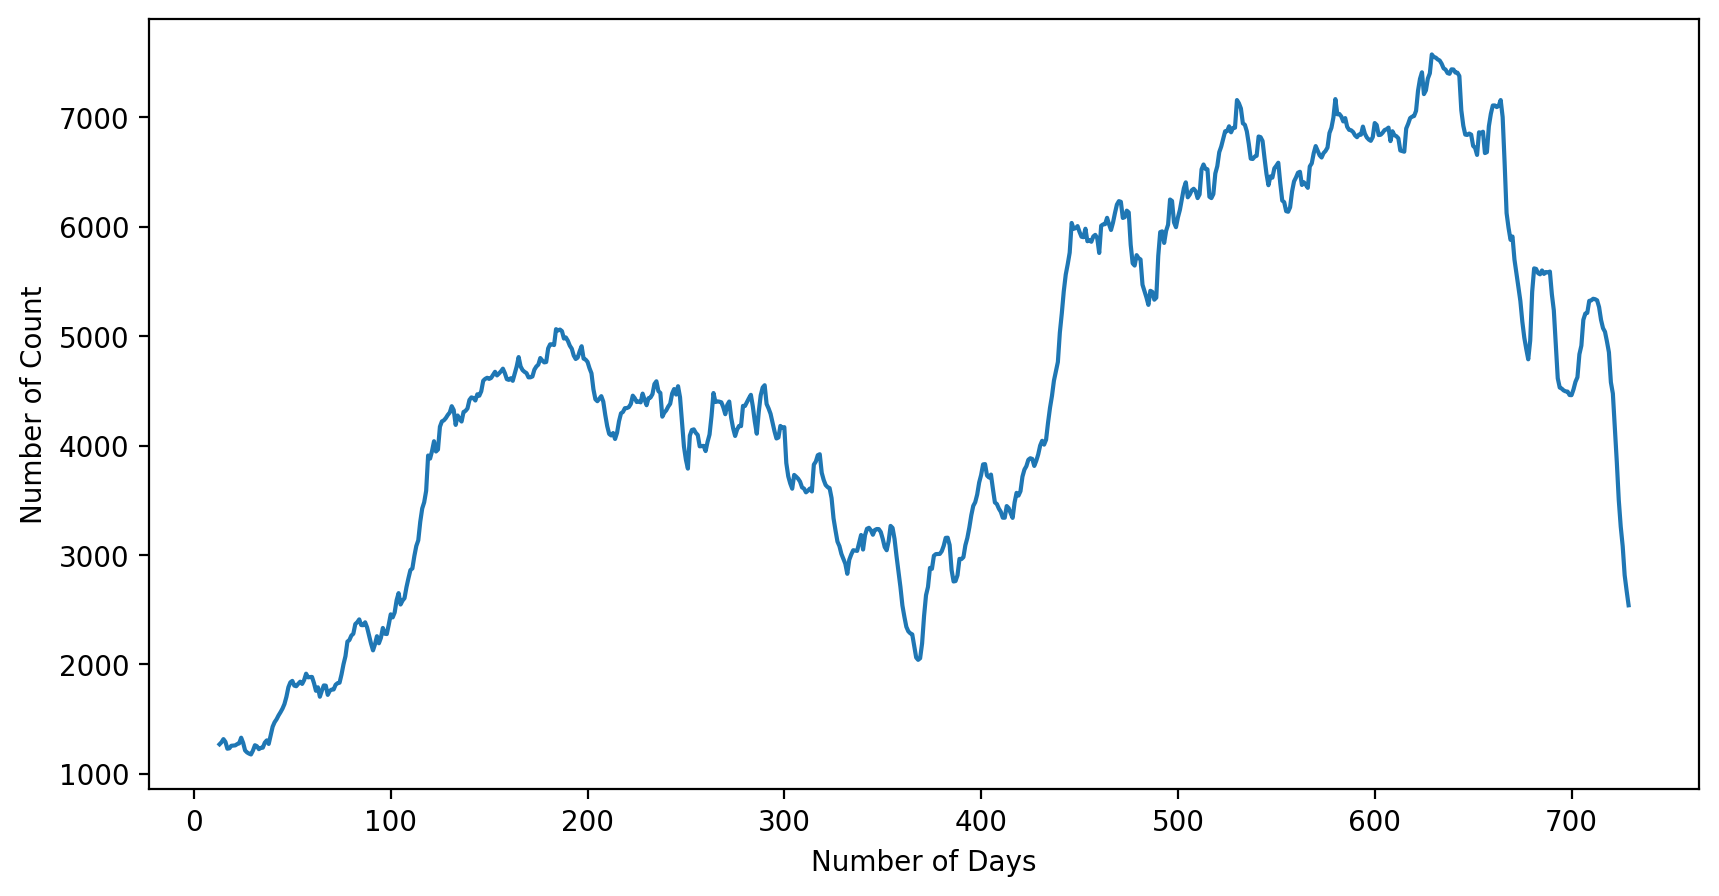

In [23]:
df['Count'].rolling(14).mean().plot()
plt.xlabel('Number of Days')
plt.ylabel('Number of Count')

In [24]:
# Barplot for Categarical column

<AxesSubplot:xlabel='month', ylabel='Count'>

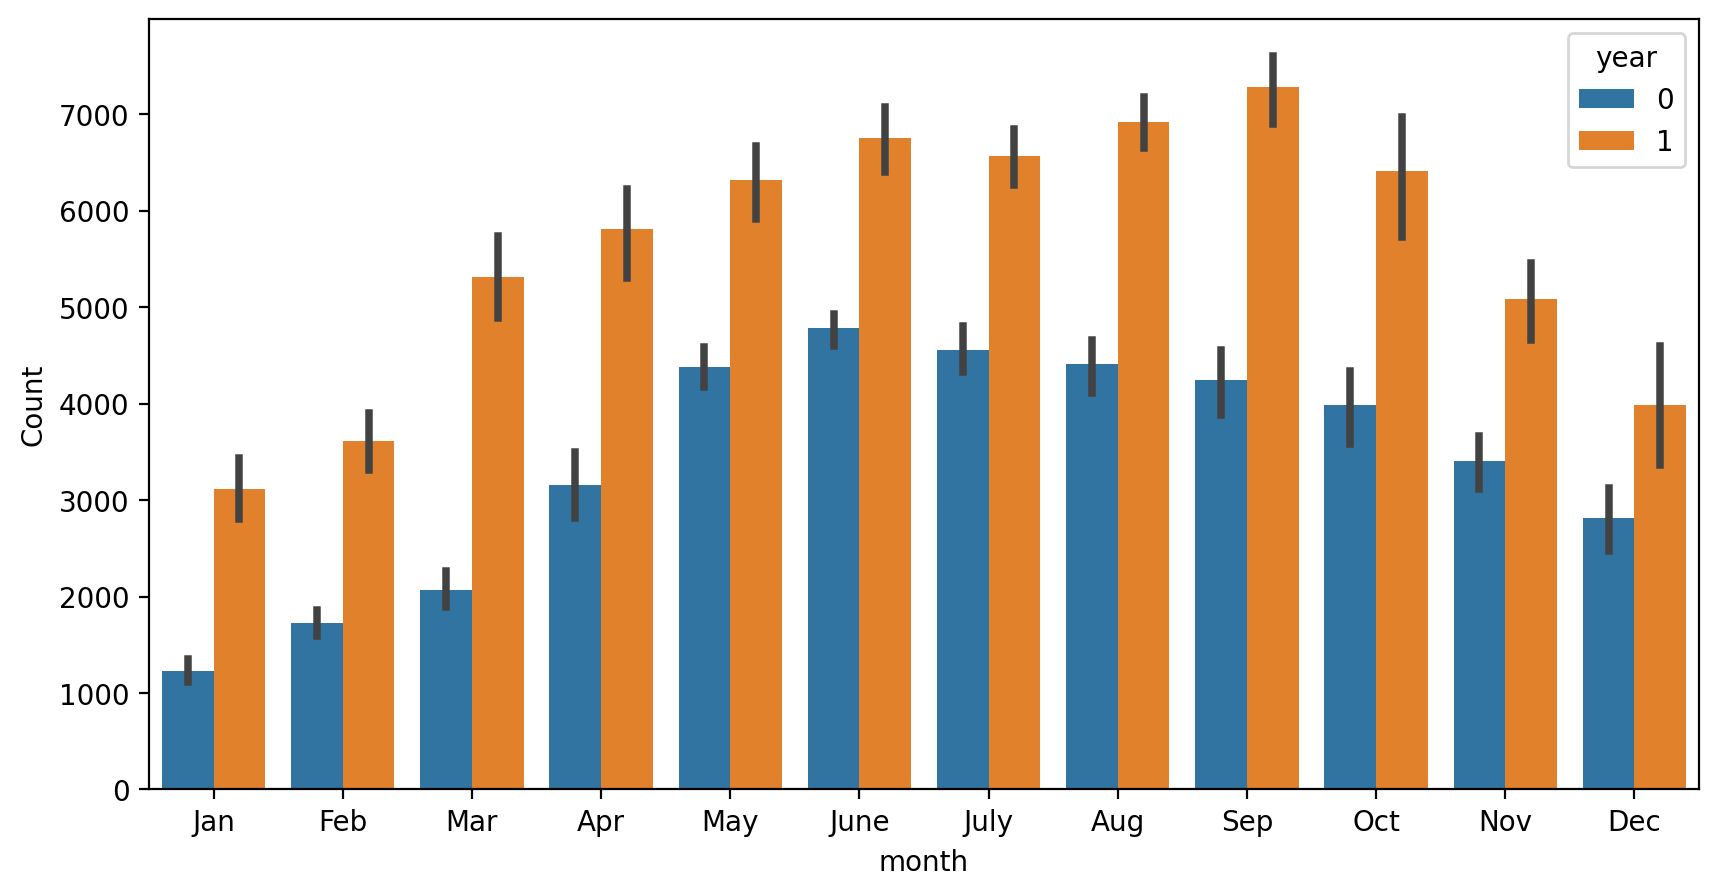

In [25]:
sns.barplot(data=df,x=df['month'],y=df['Count'],hue=df['year'])

- April to october demand is high
- In september 2019 sales is maximum 
- in june 2018 sales is maximum

<AxesSubplot:xlabel='season', ylabel='Count'>

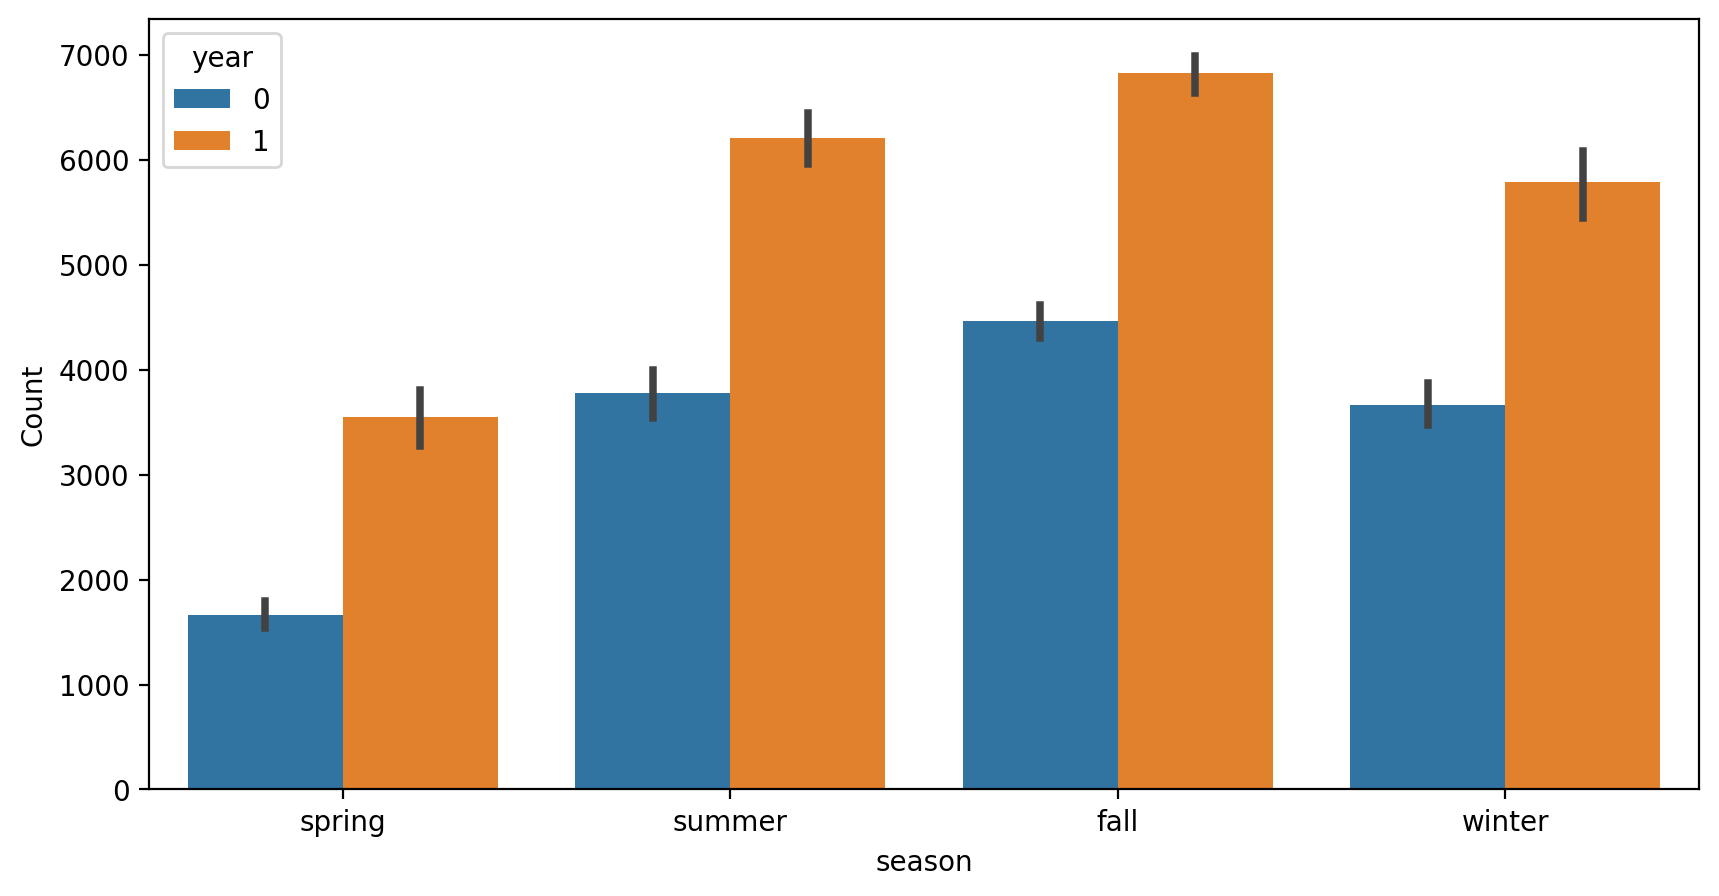

In [26]:
sns.barplot(data=df,x=df['season'],y=df['Count'],hue=df['year'])

- In Fall And Summer demand is high

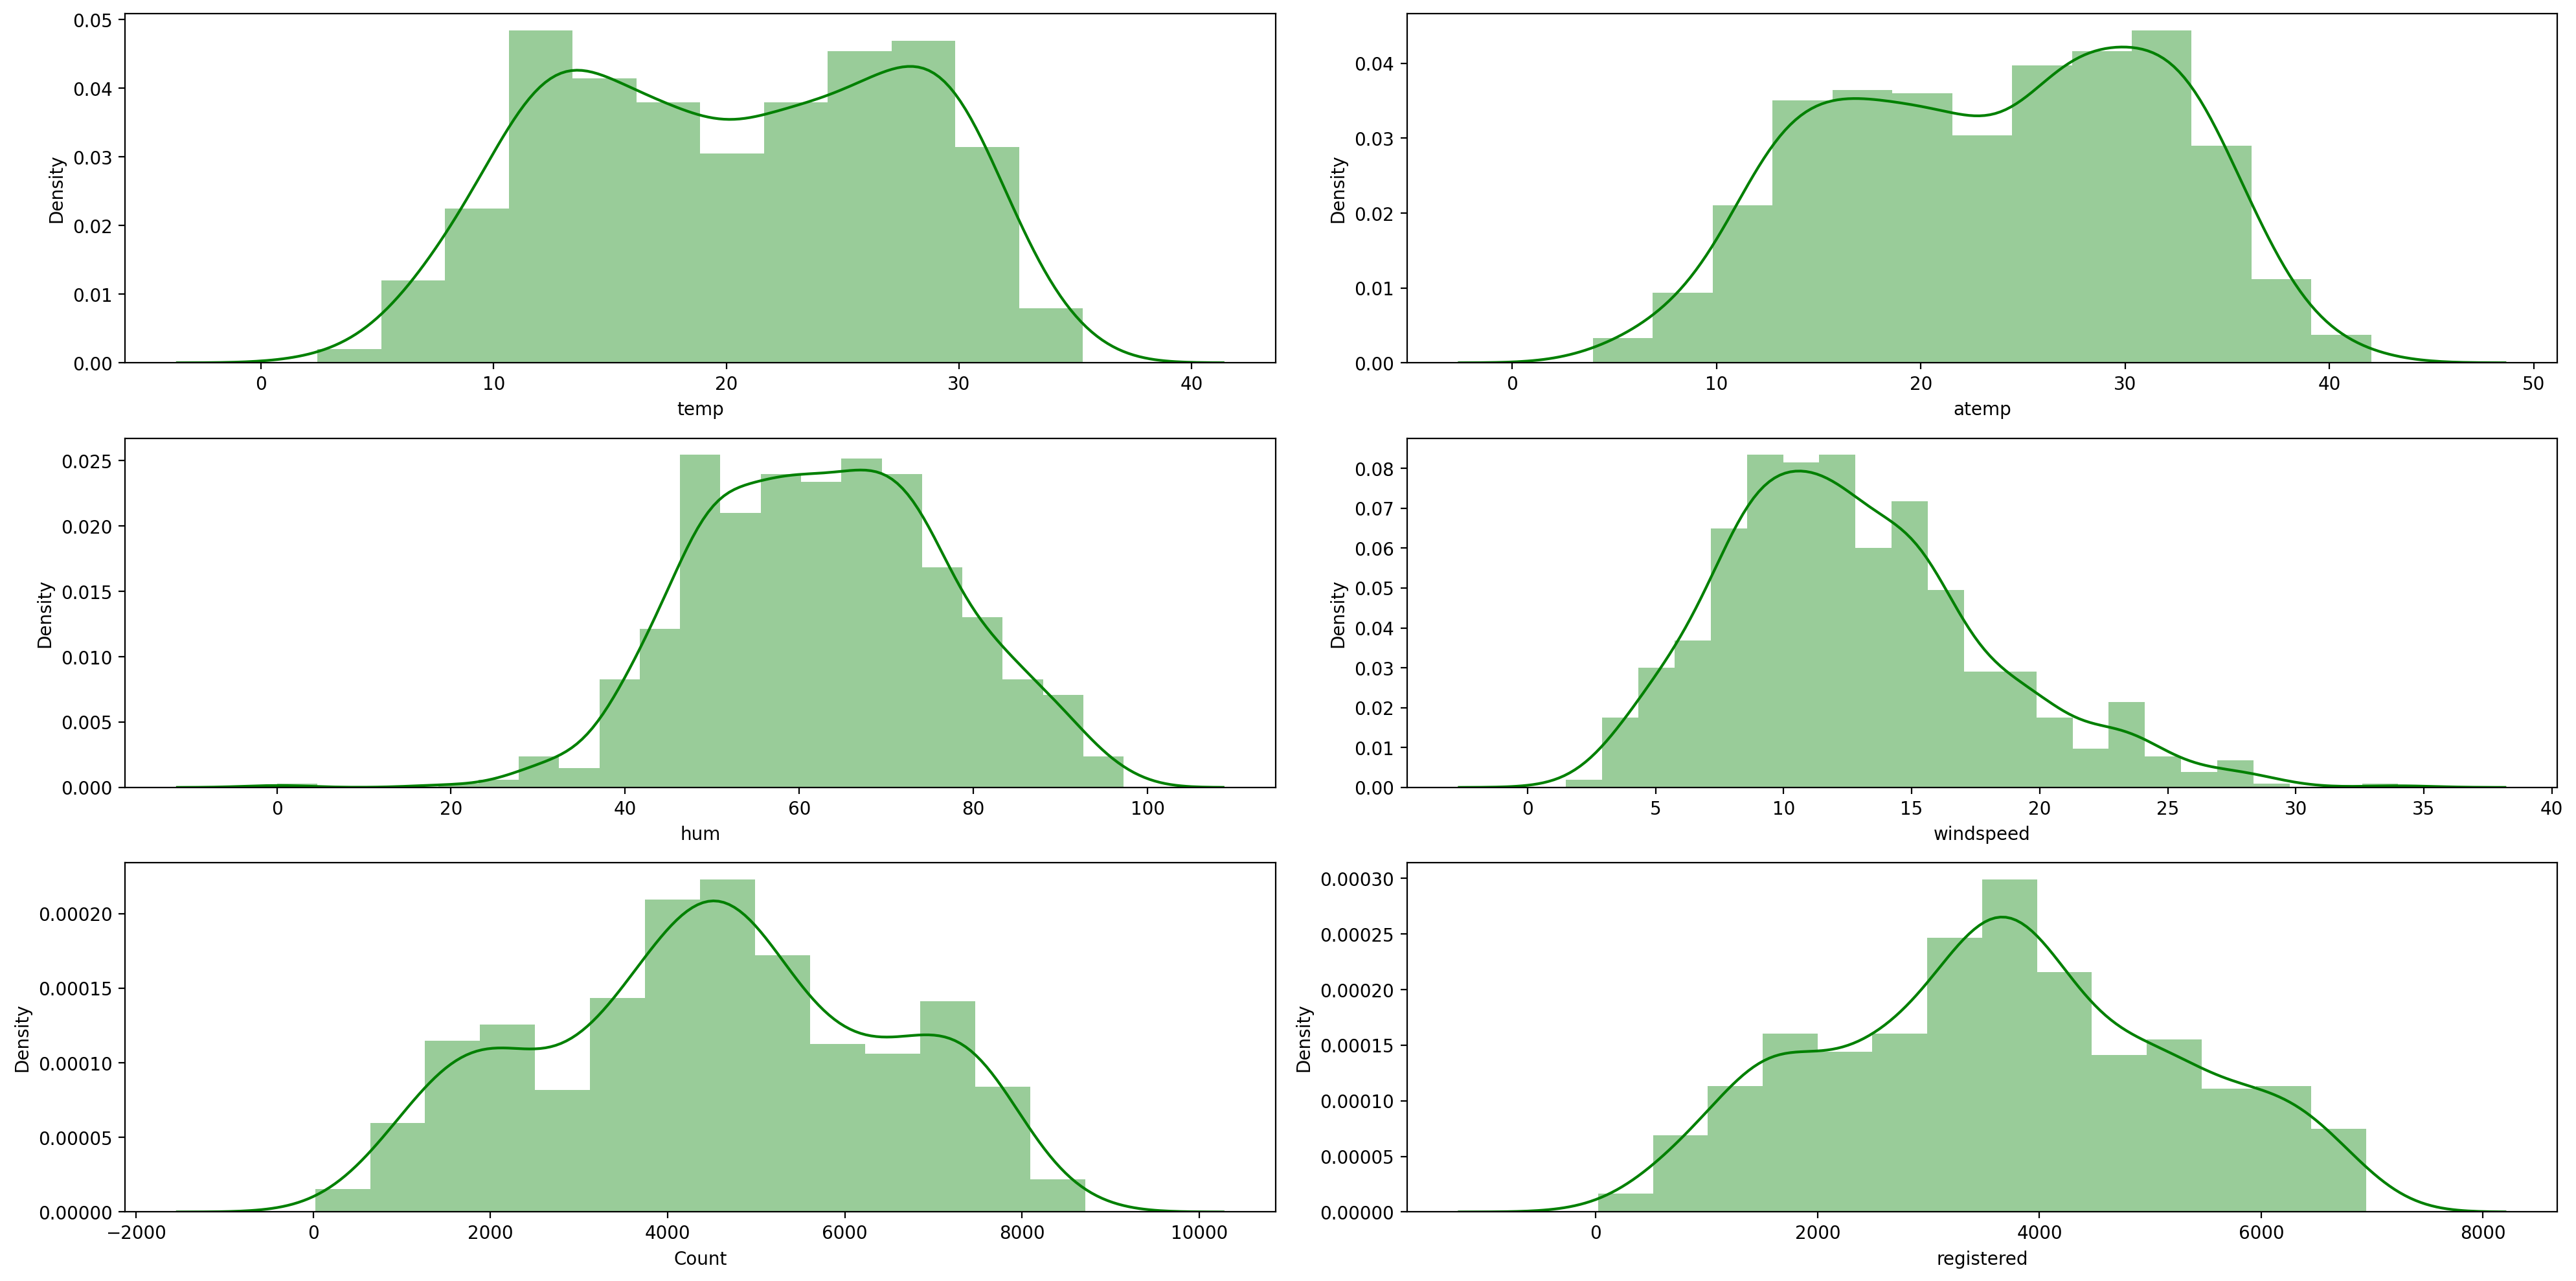

In [27]:
fig,ax=plt.subplots(3, 2, figsize=(20,10))

sns.distplot(df.temp,ax=ax[0,0],color='g')
sns.distplot(df.atemp,ax=ax[0,1],color='g')
sns.distplot(df.hum,ax=ax[1,0],color='g')
sns.distplot(df.windspeed,ax=ax[1,1],color='g')
sns.distplot(df.Count,ax=ax[2,0],color='g')
sns.distplot(df.registered,ax=ax[2,1],color='g')

plt.tight_layout()

In [28]:
# boxplot of count for all categorical variables.

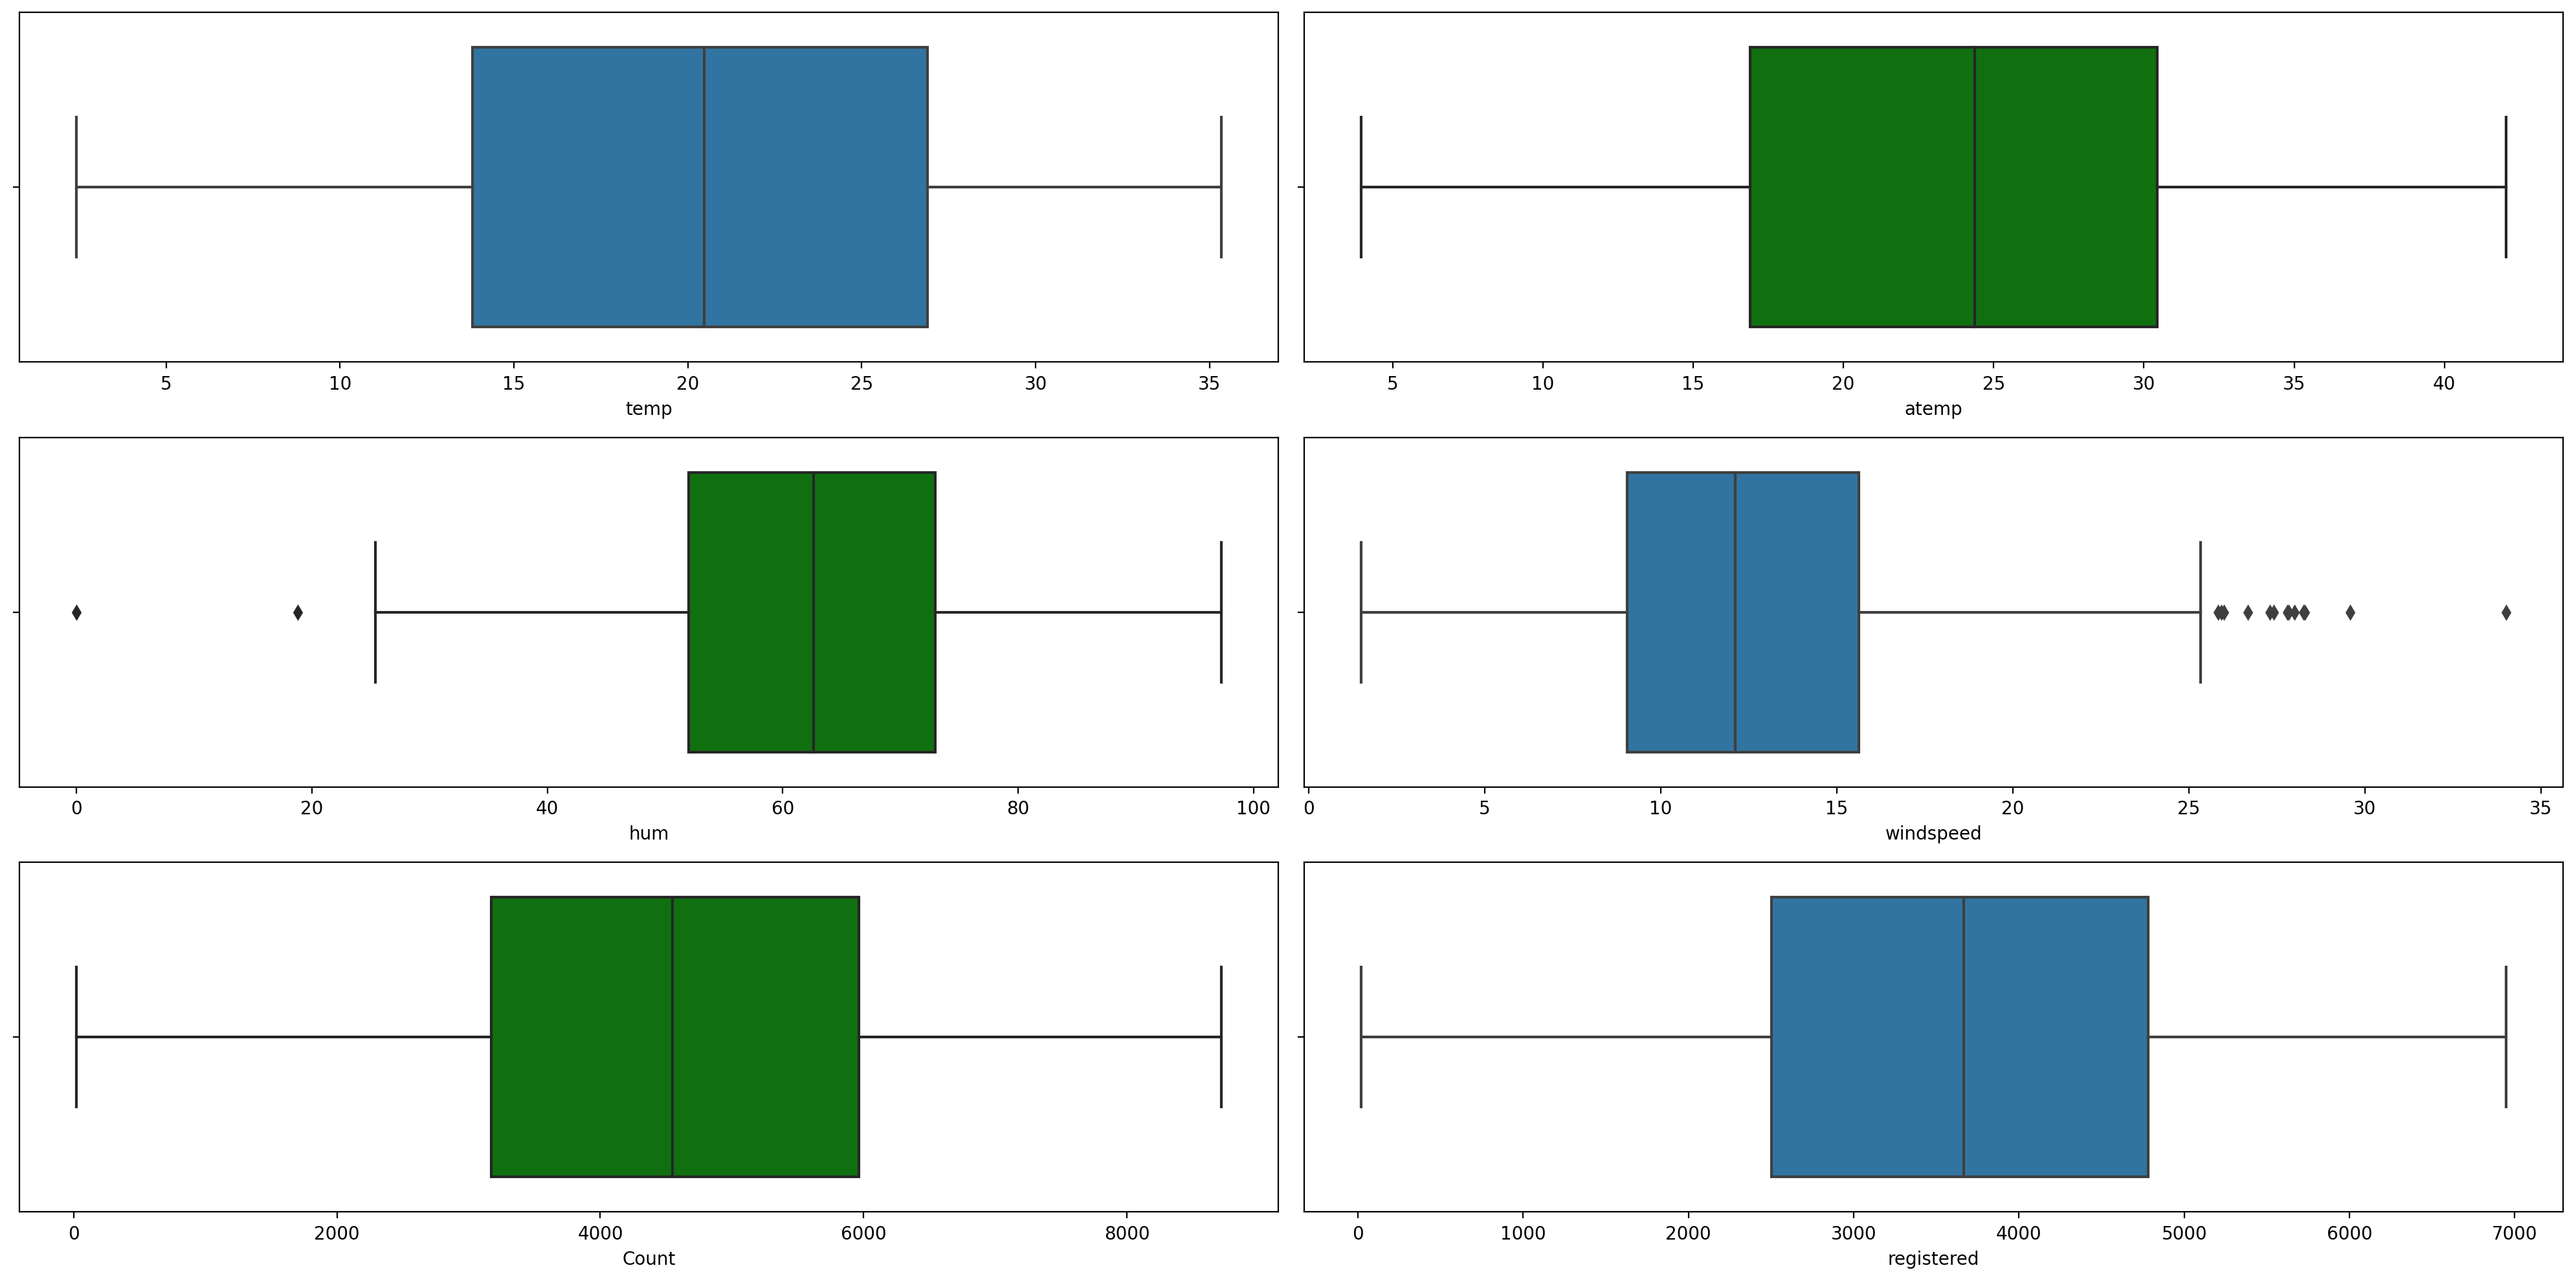

In [29]:
fig,ax=plt.subplots(3, 2, figsize=(20,10))

sns.boxplot(df.temp,ax=ax[0,0])
sns.boxplot(df.atemp,ax=ax[0,1],color='g')
sns.boxplot(df.hum,ax=ax[1,0],color='g')
sns.boxplot(df.windspeed,ax=ax[1,1])
sns.boxplot(df.Count,ax=ax[2,0],color='g')
sns.boxplot(df.registered,ax=ax[2,1])


plt.tight_layout()

In [30]:
# boxplot of count for all numeric variables.

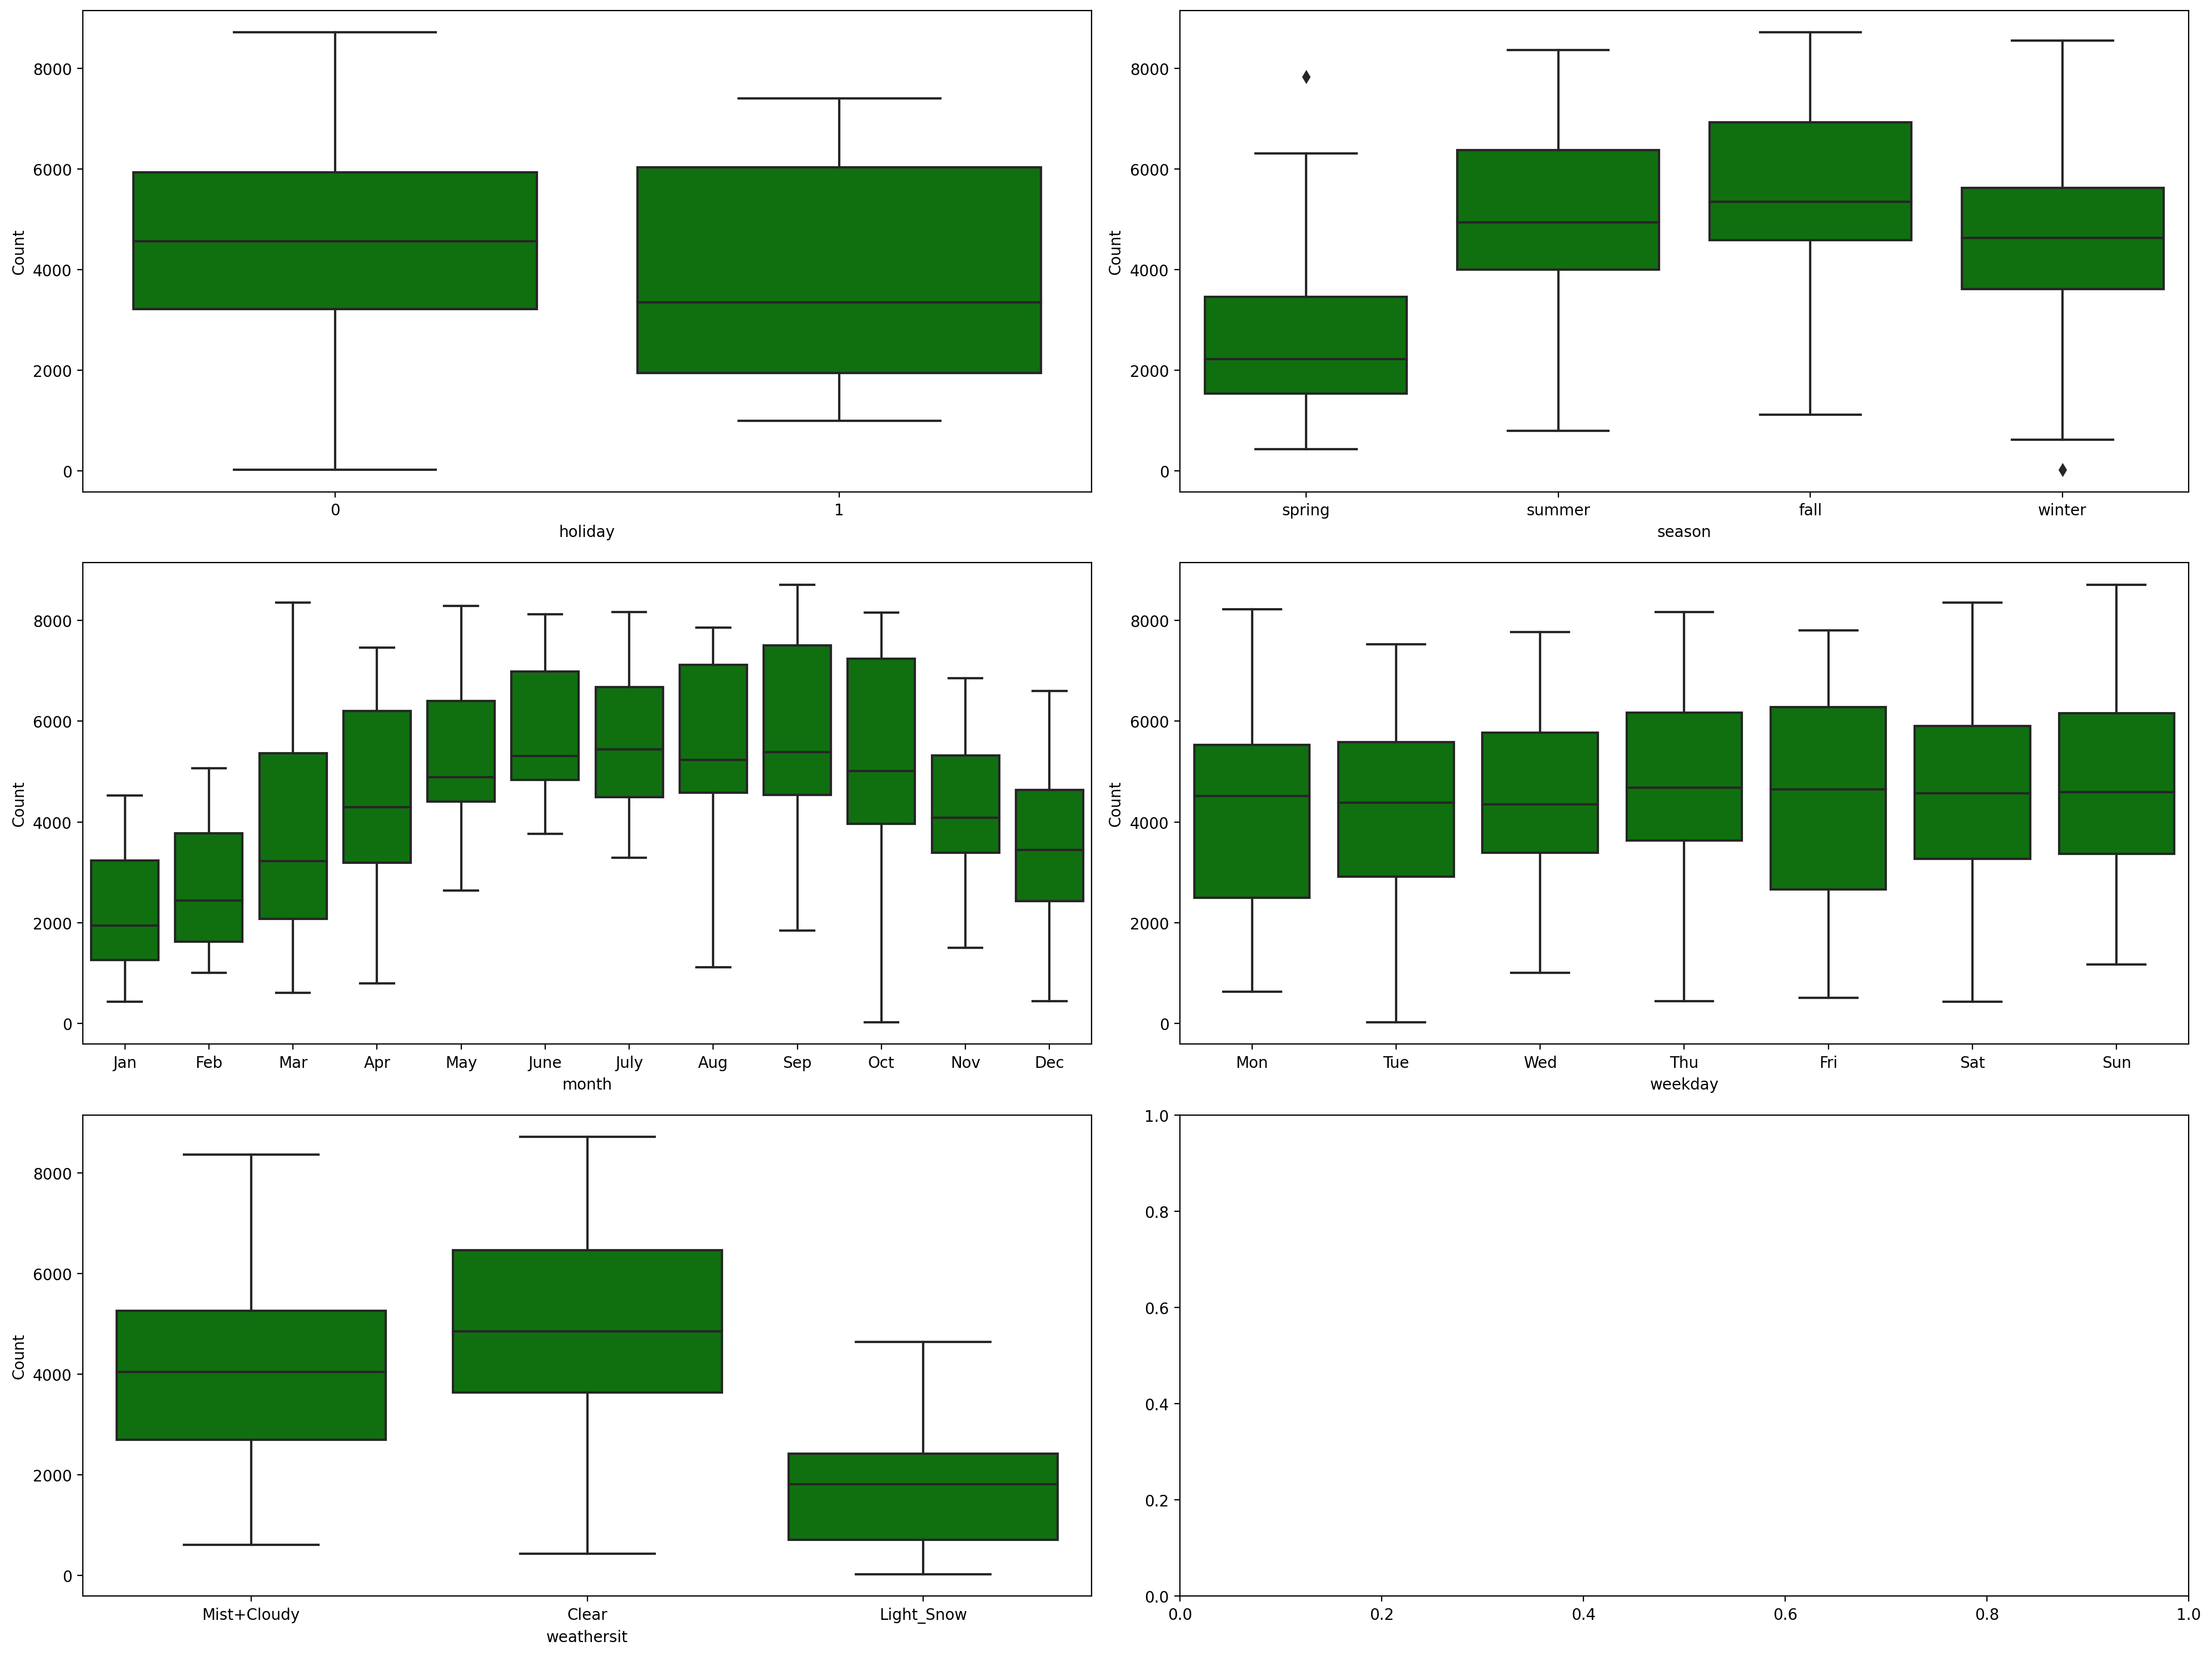

In [31]:
fig,ax=plt.subplots(3, 2, figsize=(20,15))

sns.boxplot(x ='holiday',y='Count',ax=ax[0,0],color='g',data =df)
sns.boxplot(x ='season',y='Count',ax=ax[0,1],color='g',data =df)
sns.boxplot(x ='month',y='Count',ax=ax[1,0],color='g',data =df)
sns.boxplot(x ='weekday',y='Count',ax=ax[1,1],color='g',data =df)
sns.boxplot(x ='weathersit',y='Count',ax=ax[2,0],color='g',data =df)

plt.tight_layout()

OBSERVATION:

- Demand of shared bikes is more during FALL followed by SUMMER as the bike riding conditions are favourable during these seasons.

- Demand of shared bikes is clearly more in 2019 than in 2018. This may be due to an increase in awareness with every passing year.

- Clearly, the demand of bikes is more in the months from May to October which are again FALL and SUMMER months.

- Over non-Holidays, demand is more. This may be because people might be spending more family time at home or preferring car rentals for family commutation. weekday/workingday hardly affects the count

- Most of the shared bikes are rented on 'Clear, Mist_Cloudy' day.



In [32]:
# Pairplot For all numeric variables with Target column

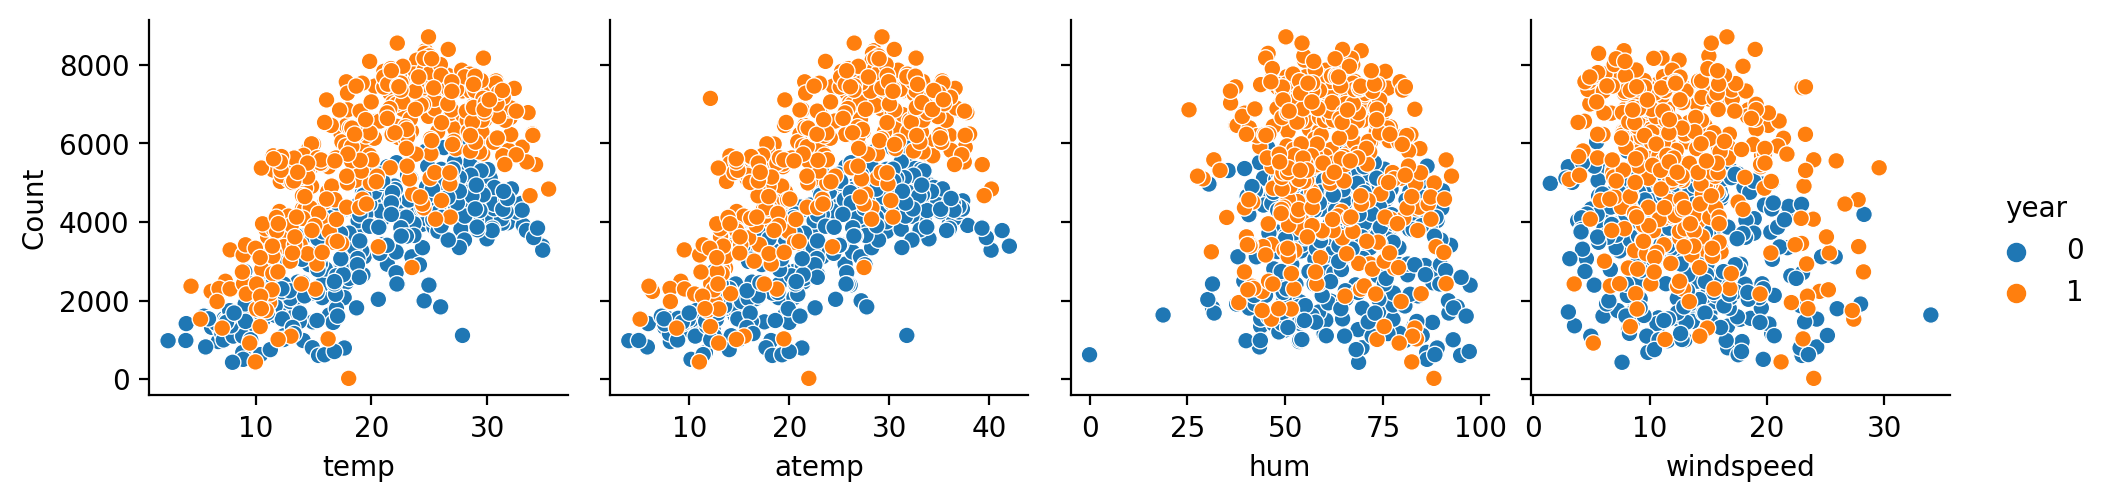

In [33]:
sns.pairplot(data = df,x_vars=df[['temp','atemp','hum','windspeed']],y_vars=df[['Count']] , hue ='year')

In [34]:
# Pairplot For all categorical variables with Target column

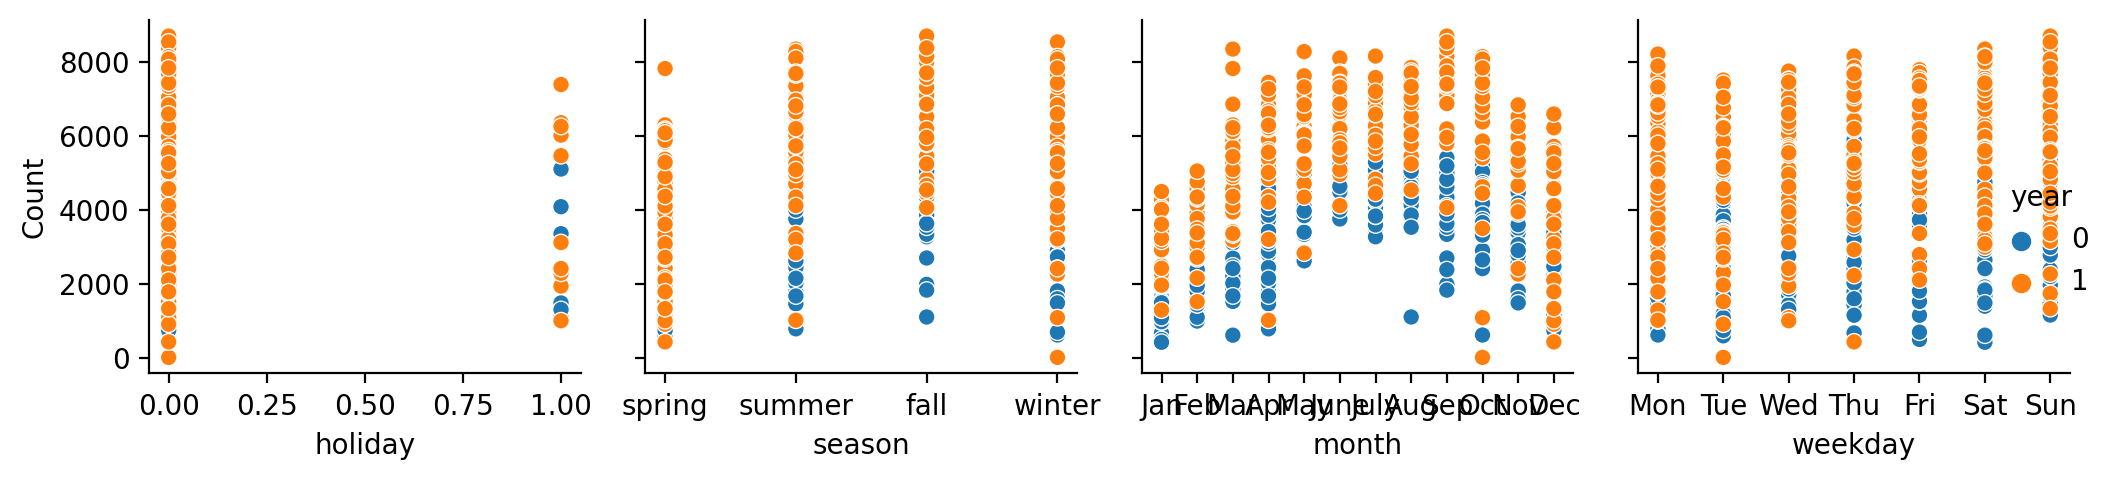

In [35]:
sns.pairplot(data = df,x_vars=df[['holiday','season','month','weekday']],y_vars=df[['Count']], hue = 'year')
plt.tight_layout()

# Data Building

In [36]:
months=pd.get_dummies(df.month,drop_first=True)
weekdays=pd.get_dummies(df.weekday,drop_first=True)
weather_sit=pd.get_dummies(df.weathersit,drop_first=True)
seasons=pd.get_dummies(df.season,drop_first=True)

In [37]:
df = pd.concat([months,weekdays,weather_sit,seasons,df],axis=1)

In [38]:
df.sample(5)

Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  ...  weekday  \
615    0    0    0    0     0     0    0    0    0    0  ...      Sun   
616    0    0    0    0     0     0    0    0    0    0  ...      Mon   
125    0    0    0    0     0     0    0    1    0    0  ...      Sun   
156    0    0    0    0     0     1    0    0    0    0  ...      Wed   
537    0    0    0    0     0     1    0    0    0    0  ...      Sat   

     workingday   weathersit       temp     atemp      hum  windspeed  casual  \
615           0  Mist+Cloudy  27.025847  30.55605  79.9167  18.833968    1557   
616           1        Clear  25.010000  28.94625  54.7500  15.041232    2570   
125           0        Clear  19.645847  23.70585  59.0000  15.292482     894   
156           1        Clear  27.811653  31.09290  60.0000   8.167032     673   
537           0        Clear  31.877500  36.20605  57.3750  12.250414     964   

     registered  Count  
615        4419   5976  
616        5657   8227  
125        3714   4608  
156        3875   4548  
537        4859   5823  

[5 rows x 37 columns]

In [39]:
df.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light_Snow',
       'Mist+Cloudy', 'spring', 'summer', 'winter', 'Date', 'season', 'year',
       'month', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'Count'],
      dtype='object')

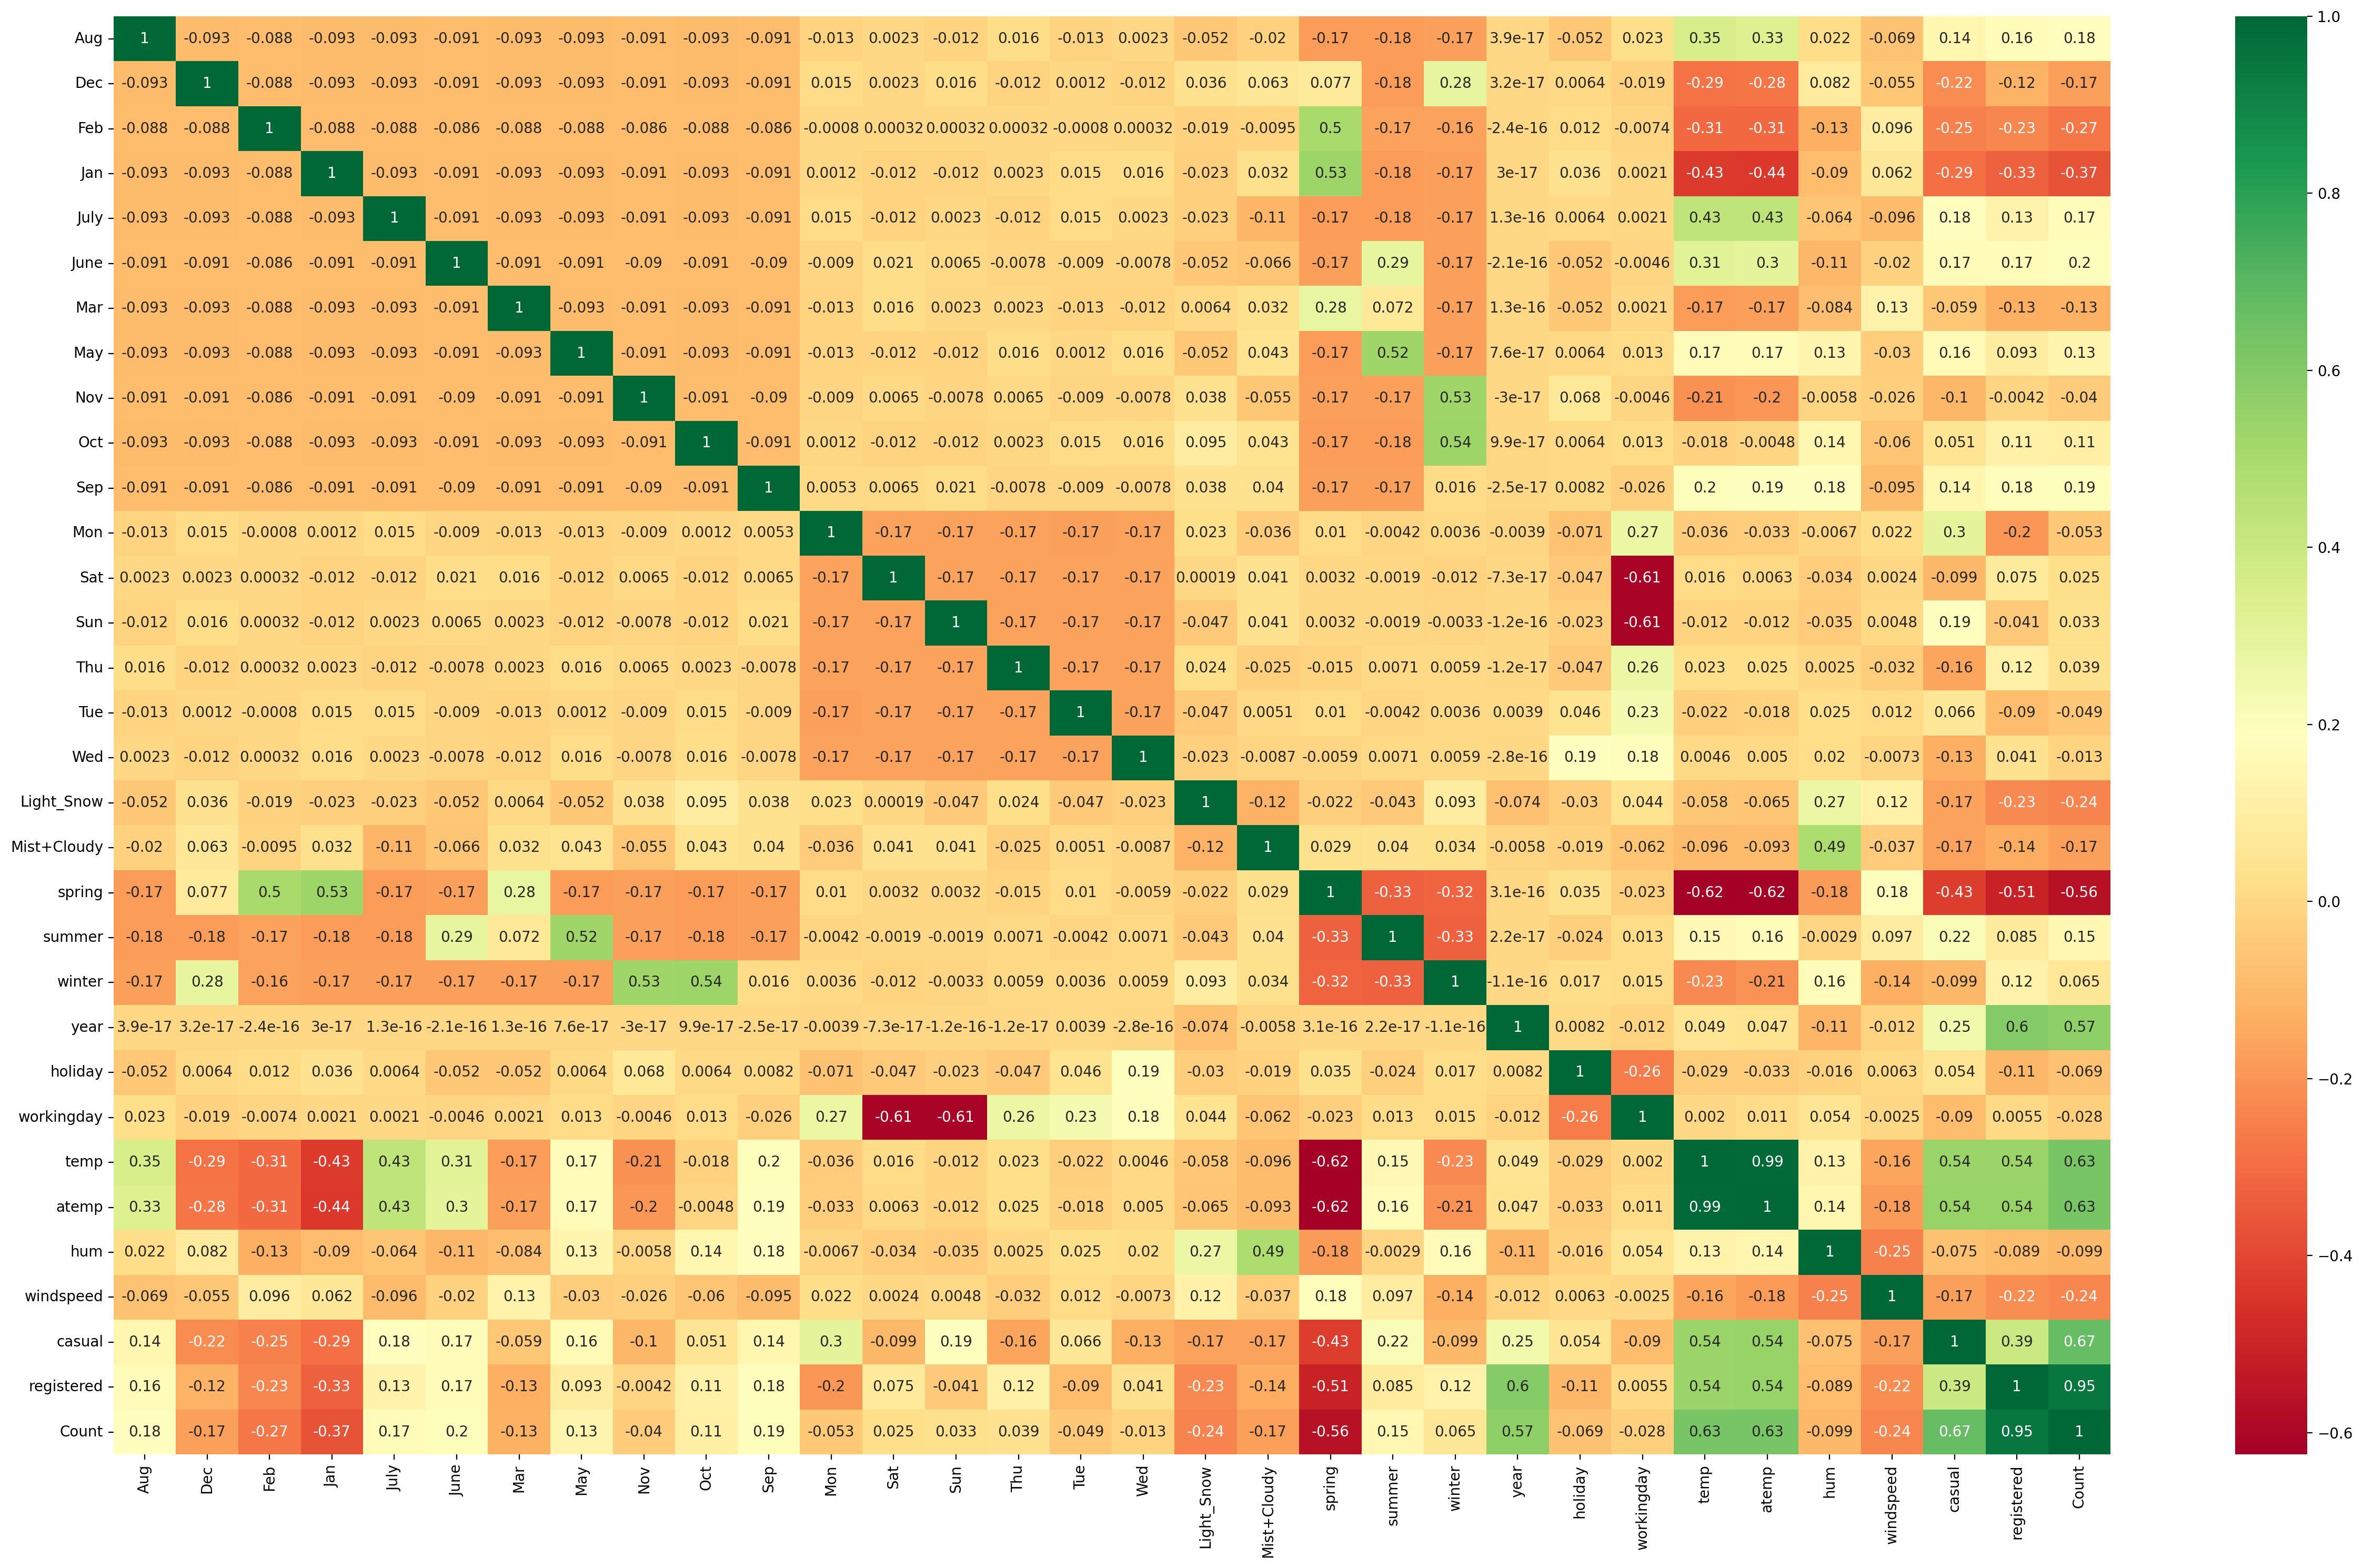

In [40]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot =True,cmap='RdYlGn')
plt.tight_layout()
plt.show()

- Registered user is strongly correlated with Target Column
- Since Casual and Registered column are actually Target Feature
- Temp and atemp are very strongly correlated each other, so one can be droped
- we have already a Target column so, we can drop both Registered and Casual

In [41]:
df.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light_Snow',
       'Mist+Cloudy', 'spring', 'summer', 'winter', 'Date', 'season', 'year',
       'month', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'Count'],
      dtype='object')

In [42]:
df.drop([ 'Date', 'season','month','weekday','weathersit','casual', 'registered'],axis=1,inplace=True)

In [43]:
df.sample(5)

Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  ...  summer  winter  \
98     0    0    0    0     0     0    0    0    0    0  ...       1       0   
352    0    1    0    0     0     0    0    0    0    0  ...       0       1   
94     0    0    0    0     0     0    0    0    0    0  ...       1       0   
499    0    0    0    0     0     0    0    1    0    0  ...       1       0   
341    0    1    0    0     0     0    0    0    0    0  ...       0       1   

     year  holiday  workingday       temp     atemp      hum  windspeed  Count  
98      0        0           1  14.042500  17.07645  87.7500   8.916561   2455  
352     0        0           1  11.343347  14.04665  63.7500  11.584032   3403  
94      0        0           1  16.980847  19.91750  64.2083  26.000489   1795  
499     1        0           1  25.078347  28.82020  79.4583   9.875264   5115  
341     0        0           0  10.899153  12.84690  58.0000  16.083886   3322  

[5 rows x 30 columns]

# Model Buliding

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [45]:
df_train,df_test = train_test_split(df,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


Rescaling the features using Min-Max scaling

In [46]:
scaler = MinMaxScaler()
num_vars = ['temp','atemp','windspeed','hum','Count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [47]:
x_train = df_train.drop(['Count'],axis=1)
y_train = df_train['Count']
print(x_train.shape)
x_train

(510, 29)


Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  ...  spring  summer  \
576    0    0    0    0     1     0    0    0    0    0  ...       0       0   
426    0    0    0    0     0     0    1    0    0    0  ...       1       0   
728    0    1    0    0     0     0    0    0    0    0  ...       1       0   
482    0    0    0    0     0     0    0    0    0    0  ...       0       1   
111    0    0    0    0     0     0    0    0    0    0  ...       0       1   
..   ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...     ...     ...   
578    1    0    0    0     0     0    0    0    0    0  ...       0       0   
53     0    0    1    0     0     0    0    0    0    0  ...       1       0   
350    0    1    0    0     0     0    0    0    0    0  ...       0       0   
79     0    0    0    0     0     0    1    0    0    0  ...       0       1   
520    0    0    0    0     0     1    0    0    0    0  ...       0       1   

     winter  year  holiday  workingday      temp     atemp       hum  \
576       0     1        0           1  0.815169  0.766351  0.725633   
426       0     1        0           0  0.442393  0.438975  0.640189   
728       0     1        0           1  0.245101  0.200348  0.498067   
482       0     1        0           0  0.395666  0.391735  0.504508   
111       0     0        0           0  0.345824  0.318819  0.751824   
..      ...   ...      ...         ...       ...       ...       ...   
578       0     1        0           1  0.863973  0.824359  0.679690   
53        0     0        0           1  0.202618  0.218747  0.435939   
350       1     0        0           1  0.248216  0.223544  0.577930   
79        0     0        0           1  0.462664  0.434043  0.759870   
520       0     1        0           1  0.600225  0.586515  0.632030   

     windspeed  
576   0.264686  
426   0.255342  
728   0.663106  
482   0.188475  
111   0.380981  
..         ...  
578   0.187140  
53    0.111379  
350   0.431816  
79    0.529881  
520   0.359599  

[510 rows x 29 columns]

In [48]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_train)
r2_score(y_true= y_train, y_pred=y_pred)

0.8502372888212871

In [49]:
# Feature Selection using REF(Recursive Feature Elimination)

In [50]:
#using RFE to reduce the dimension of data
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(x_train,y_train)

In [51]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thu', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 11),
 ('Light_Snow', True, 1),
 ('Mist+Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [52]:
# RFE Selected Features
col = x_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light_Snow', 'Mist+Cloudy',
       'spring', 'summer', 'winter', 'year', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [53]:
# Features Rejected by the RFE
x_train.columns[~(rfe.support_)]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday', 'atemp'],
      dtype='object')

In [54]:
x_train_rfe = x_train[col]

In [55]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: Count, Length: 510, dtype: float64

In [56]:
x_train_X1 = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_X1).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 20 May 2023   Prob (F-statistic):          8.15e-189
Time:                        12:17:49   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3197      0.036      8.859      0.000       0.249       0.391
Dec            -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan            -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July           -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov            -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep             0.0755      0.017      4.466      0.000       0.042       0.109
Light_Snow     -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist+Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring         -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer          0.0423      0.015      2.761      0.006       0.012       0.072
winter          0.1019      0.018      5.656      0.000       0.067       0.137
year            0.2304      0.008     28.487      0.000       0.215       0.246
holiday        -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp            0.4815      0.037     13.005      0.000       0.409       0.554
hum            -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed      -0.1887      0.026     -7.315      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OBSERVATION :

- Looking at the p-values, it looks like 'month_jan, and 'holiday' aren't really significant

Maybe we could drop? Lets see the VIF.

Checking VIF

- Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

In [57]:
# Calculation of VIF
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
13          hum  30.89
12         temp  17.79
14    windspeed   4.72
7        spring   4.37
9        winter   4.06
8        summer   2.82
6   Mist+Cloudy   2.32
10         year   2.09
3           Nov   1.85
1           Jan   1.75
2          July   1.59
0           Dec   1.56
4           Sep   1.41
5    Light_Snow   1.28
11      holiday   1.06

OBSERVATION:

- humidity has a significantally very high VIF. Lets drop this first over month_jan and holiday

# Model 2

In [58]:
# Dropping highly correlated variable 'humidity'
x2 = x_train_rfe.drop('hum',axis =1)
# Adding constant
x_train_lm2 = sm.add_constant(x2)
# building second fitted model
model2 = sm.OLS(y_train,x_train_lm2).fit()
# summary statistics of model obtained
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sat, 20 May 2023   Prob (F-statistic):          4.75e-186
Time:                        12:17:49   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2450      0.032      7.618      0.000       0.182       0.308
Dec            -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Jan            -0.0500      0.018     -2.719      0.007      -0.086      -0.014
July           -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Nov            -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Sep             0.0687      0.017      4.015      0.000       0.035       0.102
Light_Snow     -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Mist+Cloudy    -0.0801      0.009     -9.198      0.000      -0.097      -0.063
spring         -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer          0.0349      0.015      2.251      0.025       0.004       0.065
winter          0.0869      0.018      4.831      0.000       0.052       0.122
year            0.2345      0.008     28.687      0.000       0.218       0.251
holiday        -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp            0.4387      0.036     12.093      0.000       0.367       0.510
windspeed      -0.1585      0.025     -6.276      0.000      -0.208      -0.109
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Calculation of VIF
vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF'] = [variance_inflation_factor(x2.values,i) for i in range(x2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
12         temp  5.17
13    windspeed  4.67
9        winter  2.95
7        spring  2.89
8        summer  2.24
10         year  2.07
3           Nov  1.81
1           Jan  1.66
2          July  1.59
6   Mist+Cloudy  1.57
0           Dec  1.47
4           Sep  1.35
5    Light_Snow  1.09
11      holiday  1.06

OBSERVATION:

- Since, we have seen temp has a higher correlation with the count, lets not drop it even though it has higher VIF.

- Lets drop Nov with high p-value

# model 3

In [60]:
# Dropping insignificant variable 'Nov'
x3 = x2.drop('Nov',axis =1)
# Adding constant
x_train_lm3 = sm.add_constant(x3)
# building third fitted model
model3 = sm.OLS(y_train,x_train_lm3).fit()
# summary statistics of model obtained
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sat, 20 May 2023   Prob (F-statistic):          2.74e-186
Time:                        12:17:49   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2283      0.031      7.310      0.000       0.167       0.290
Dec            -0.0283      0.016     -1.731      0.084      -0.060       0.004
Jan            -0.0451      0.018     -2.467      0.014      -0.081      -0.009
July           -0.0499      0.019     -2.686      0.007      -0.086      -0.013
Sep             0.0742      0.017      4.373      0.000       0.041       0.108
Light_Snow     -0.2878      0.025    -11.677      0.000      -0.336      -0.239
Mist+Cloudy    -0.0793      0.009     -9.089      0.000      -0.096      -0.062
spring         -0.0632      0.021     -2.979      0.003      -0.105      -0.022
summer          0.0404      0.015      2.635      0.009       0.010       0.070
winter          0.0774      0.017      4.438      0.000       0.043       0.112
year            0.2343      0.008     28.573      0.000       0.218       0.250
holiday        -0.0982      0.026     -3.783      0.000      -0.149      -0.047
temp            0.4581      0.035     13.031      0.000       0.389       0.527
windspeed      -0.1594      0.025     -6.291      0.000      -0.209      -0.110
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = x3.columns
vif['VIF'] = [variance_inflation_factor(x3.values,i) for i in range(x3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
11         temp  5.14
12    windspeed  4.62
6        spring  2.89
7        summer  2.24
9          year  2.07
8        winter  2.05
1           Jan  1.65
2          July  1.59
5   Mist+Cloudy  1.57
3           Sep  1.34
0           Dec  1.29
4    Light_Snow  1.08
10      holiday  1.04

- Lets drop Dec with high p-value

# model 4

In [62]:
# Dropping insignificant variable 'month Dec'
x4 = x3.drop('Dec',axis =1)
# Adding constant
x_train_lm4 = sm.add_constant(x4)
# building fourth fitted model
model4 = sm.OLS(y_train,x_train_lm4).fit()
# summary statistics of model obtained
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sat, 20 May 2023   Prob (F-statistic):          8.14e-187
Time:                        12:17:50   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2154      0.030      7.088      0.000       0.156       0.275
Jan            -0.0383      0.018     -2.138      0.033      -0.073      -0.003
July           -0.0503      0.019     -2.706      0.007      -0.087      -0.014
Sep             0.0764      0.017      4.506      0.000       0.043       0.110
Light_Snow     -0.2854      0.025    -11.575      0.000      -0.334      -0.237
Mist+Cloudy    -0.0793      0.009     -9.067      0.000      -0.096      -0.062
spring         -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer          0.0434      0.015      2.845      0.005       0.013       0.073
winter          0.0757      0.017      4.335      0.000       0.041       0.110
year            0.2343      0.008     28.517      0.000       0.218       0.250
holiday        -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp            0.4721      0.034     13.772      0.000       0.405       0.539
windspeed      -0.1549      0.025     -6.135      0.000      -0.205      -0.105
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
vif['Features'] = x4.columns
vif['VIF'] = [variance_inflation_factor(x4.values,i) for i in range(x4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
10         temp  5.13
11    windspeed  4.62
5        spring  2.75
6        summer  2.24
8          year  2.07
7        winter  1.78
0           Jan  1.61
1          July  1.59
4   Mist+Cloudy  1.56
2           Sep  1.34
3    Light_Snow  1.08
9       holiday  1.04

- droping holiday 

# Model 5

In [64]:
# Dropping insignificant variable 'holiday'
x5 = x4.drop('holiday',axis =1)
# Adding constant
x_train_lm5 = sm.add_constant(x5)
# building fifth fitted model
model5 = sm.OLS(y_train,x_train_lm5).fit()
# summary statistics of model obtained
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.6
Date:                Sat, 20 May 2023   Prob (F-statistic):          4.79e-185
Time:                        12:17:50   Log-Likelihood:                 494.12
No. Observations:                 510   AIC:                            -964.2
Df Residuals:                     498   BIC:                            -913.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2137      0.031      6.945      0.000       0.153       0.274
Jan            -0.0391      0.018     -2.158      0.031      -0.075      -0.003
July           -0.0492      0.019     -2.612      0.009      -0.086      -0.012
Sep             0.0729      0.017      4.253      0.000       0.039       0.107
Light_Snow     -0.2813      0.025    -11.275      0.000      -0.330      -0.232
Mist+Cloudy    -0.0776      0.009     -8.772      0.000      -0.095      -0.060
spring         -0.0639      0.021     -2.974      0.003      -0.106      -0.022
summer          0.0437      0.015      2.830      0.005       0.013       0.074
winter          0.0730      0.018      4.131      0.000       0.038       0.108
year            0.2347      0.008     28.204      0.000       0.218       0.251
temp            0.4727      0.035     13.614      0.000       0.404       0.541
windspeed      -0.1568      0.026     -6.131      0.000      -0.207      -0.107
==============================================================================
Omnibus:                       71.367   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.098
Skew:                          -0.724   Prob(JB):                     1.57e-38
Kurtosis:                       5.469   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] = x5.columns
vif['VIF'] = [variance_inflation_factor(x5.values,i) for i in range(x5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
9          temp  5.13
10    windspeed  4.61
5        spring  2.74
6        summer  2.24
8          year  2.07
7        winter  1.77
0           Jan  1.61
1          July  1.59
4   Mist+Cloudy  1.56
2           Sep  1.33
3    Light_Snow  1.08

OBSERVATION:
- All p-values are near to zero or less then 0.05, well within acceptable range.

- 'temp' has a little high VIF but still near to 5

- Prob (F-statistic) is ~ 0.0000. Model is a good fit

- Rsquare and adjusted R square are close to 83%. A good sign Even though p-value for 'month July' is well within range, but its higher compared to others. Lets drop this, to avoid overfitting.

In [66]:
# Dropping insignificant variable 'season_spring'
x6 = x5.drop('Jan',axis =1)
# Adding constant
x_train_lm6 = sm.add_constant(x6)
# building sixth fitted model
model6 = sm.OLS(y_train,x_train_lm6).fit()
# summary statistics of model obtained
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.8
Date:                Sat, 20 May 2023   Prob (F-statistic):          3.00e-185
Time:                        12:17:50   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1974      0.030      6.593      0.000       0.139       0.256
July           -0.0510      0.019     -2.697      0.007      -0.088      -0.014
Sep             0.0734      0.017      4.263      0.000       0.040       0.107
Light_Snow     -0.2800      0.025    -11.186      0.000      -0.329      -0.231
Mist+Cloudy    -0.0785      0.009     -8.851      0.000      -0.096      -0.061
spring         -0.0696      0.021     -3.247      0.001      -0.112      -0.027
summer          0.0469      0.015      3.038      0.003       0.017       0.077
winter          0.0792      0.017      4.527      0.000       0.045       0.114
year            0.2339      0.008     28.037      0.000       0.218       0.250
temp            0.4920      0.034     14.611      0.000       0.426       0.558
windspeed      -0.1496      0.025     -5.880      0.000      -0.200      -0.100
==============================================================================
Omnibus:                       69.942   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.479
Skew:                          -0.711   Prob(JB):                     9.57e-38
Kurtosis:                       5.450   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif = pd.DataFrame()
vif['Features'] = x6.columns
vif['VIF'] = [variance_inflation_factor(x6.values,i) for i in range(x6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
8         temp  5.09
9    windspeed  4.60
5       summer  2.23
4       spring  2.07
7         year  2.07
6       winter  1.77
0         July  1.58
3  Mist+Cloudy  1.55
1          Sep  1.33
2   Light_Snow  1.08

- The previous model was better and so, lets continue with Model 5 as our final Model for our analysis further. The model has all the p-values and VIFs in acceptable range. The p(F-statistic value) is also close to zero showing that the model 5 is a good fit overall.

# Multicolinearity check

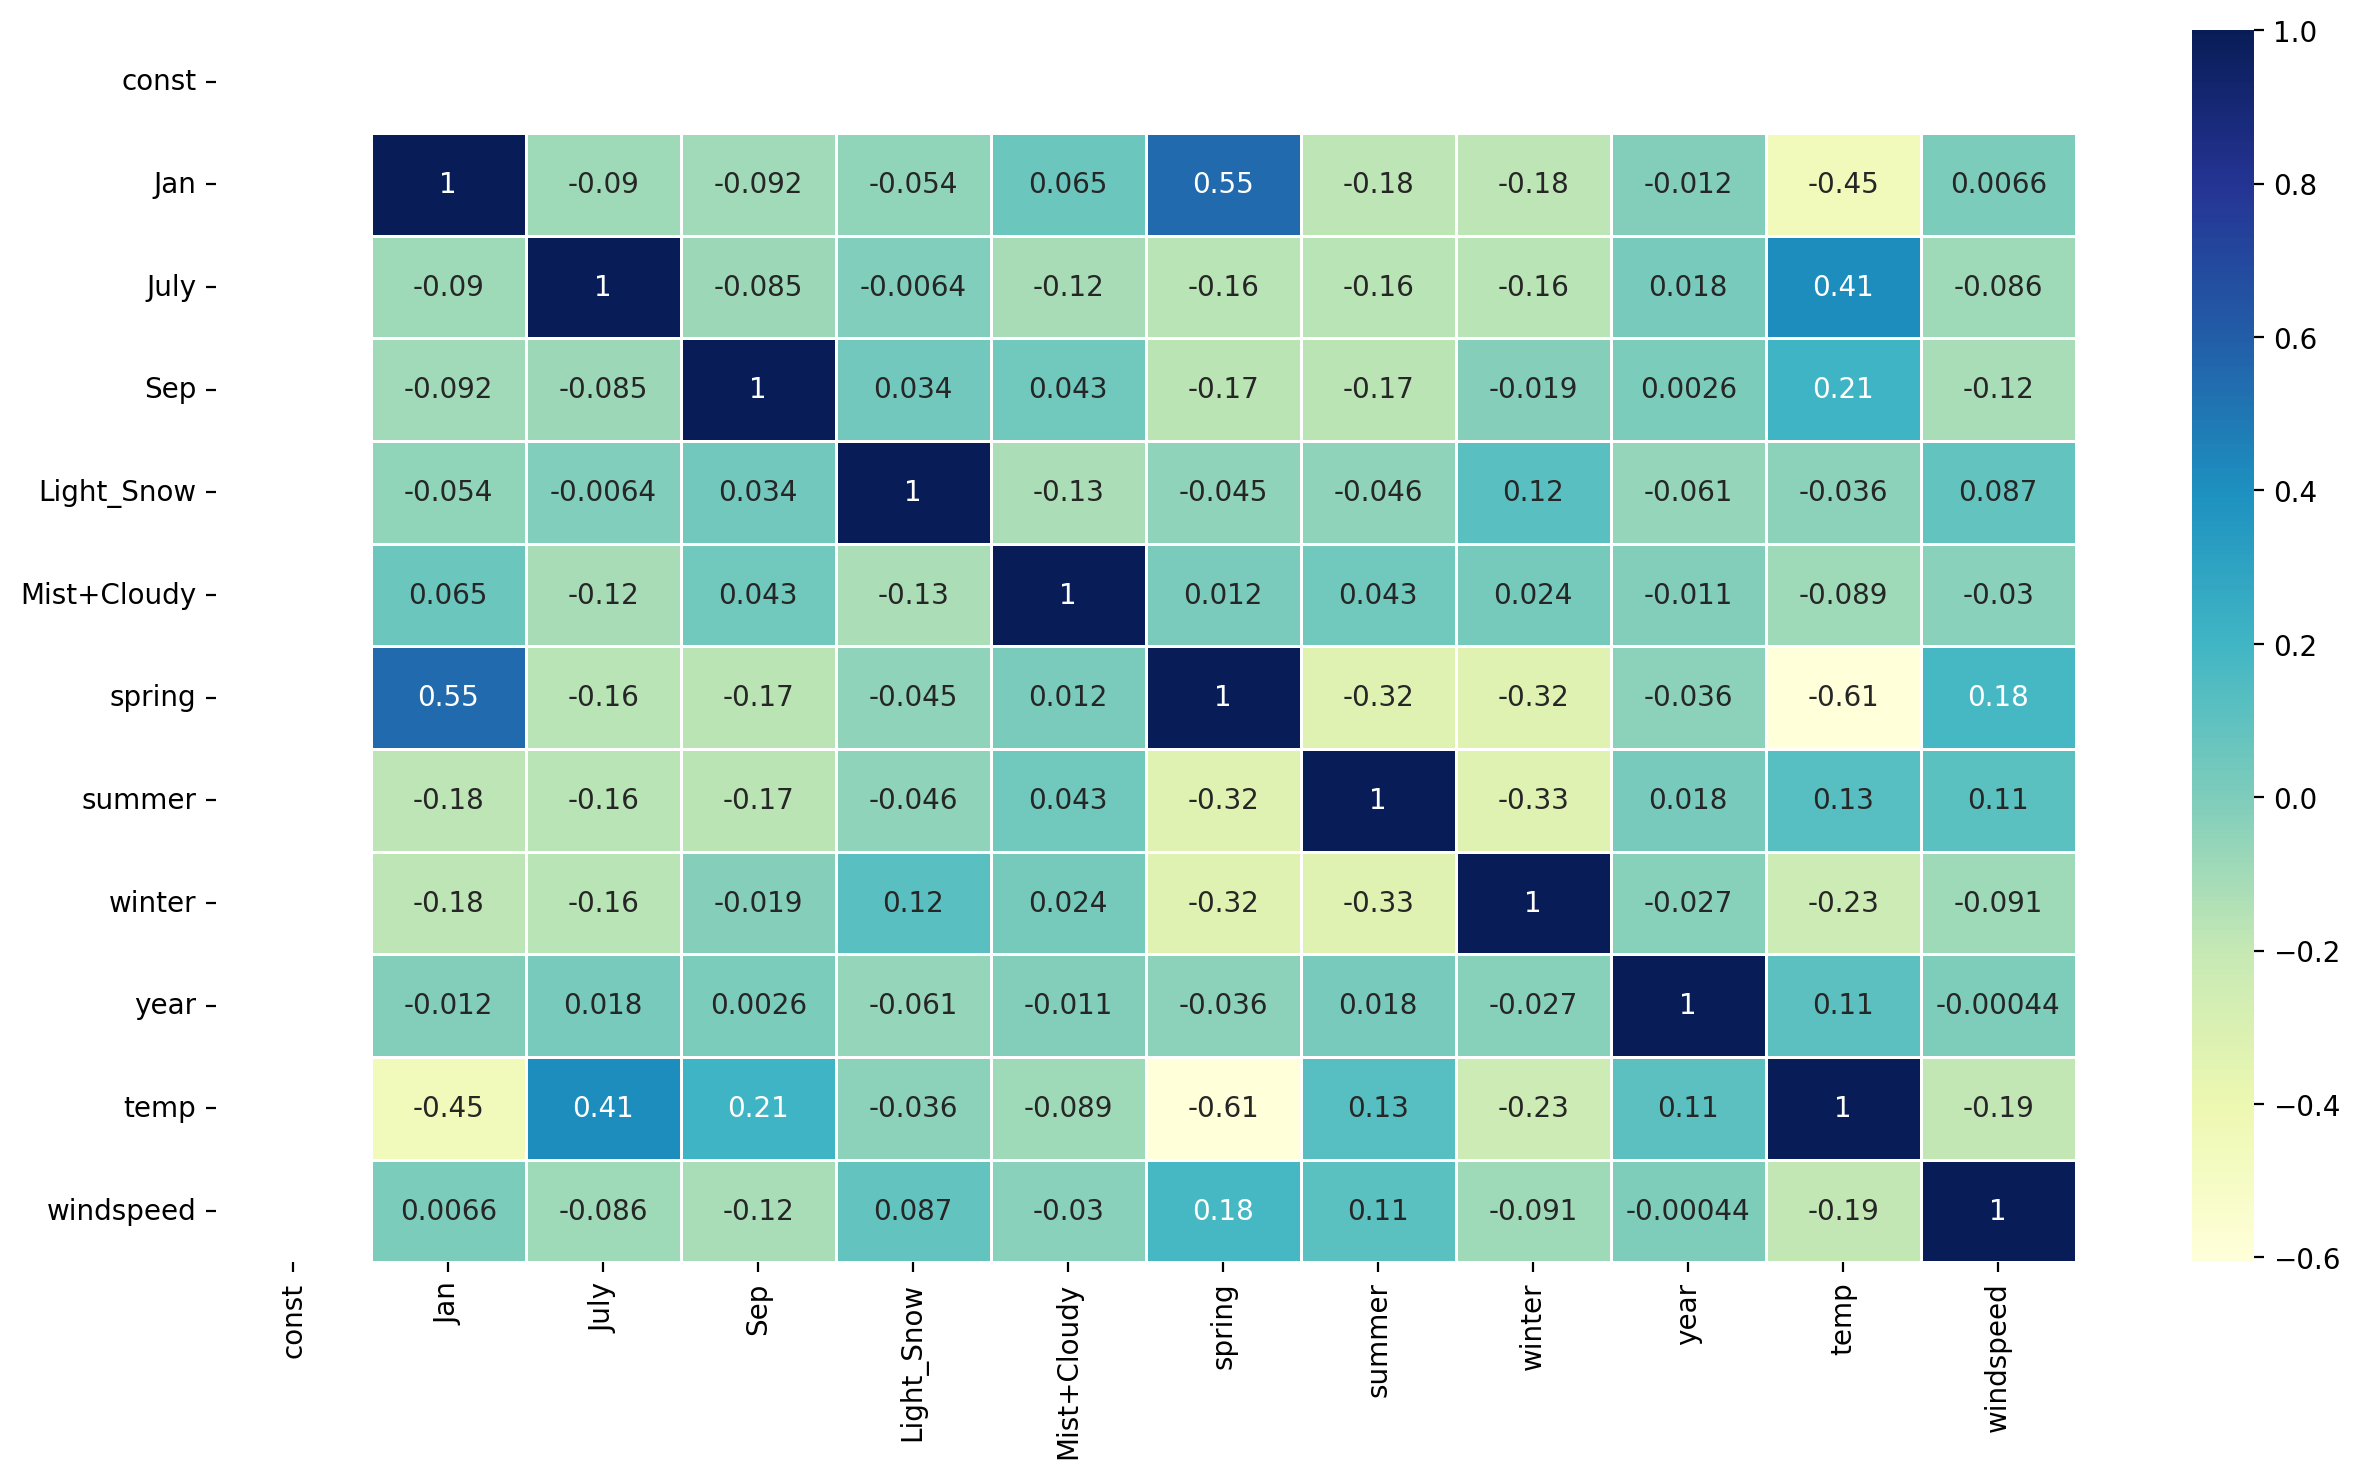

In [68]:
# Plotting heat map to check multicollinearity between predictor variables
plt.figure(figsize=(15,8))
sns.heatmap(x_train_lm5.corr(),annot = True, cmap="YlGnBu",linewidth =1)
plt.show()

# Residual Analysis

In [69]:
y_pred = model5.predict(x_train_lm5)
r2_score(y_true= y_train, y_pred=y_pred)

0.832232626981358

In [70]:
res = (y_train - y_pred)
res

576    0.084686
426   -0.010687
728   -0.192248
482   -0.089017
111   -0.092491
         ...   
578    0.005420
53    -0.010074
350    0.053845
79    -0.079044
520    0.161073
Length: 510, dtype: float64

# Assumptions
* > Error are normally Distributed with mean Zero

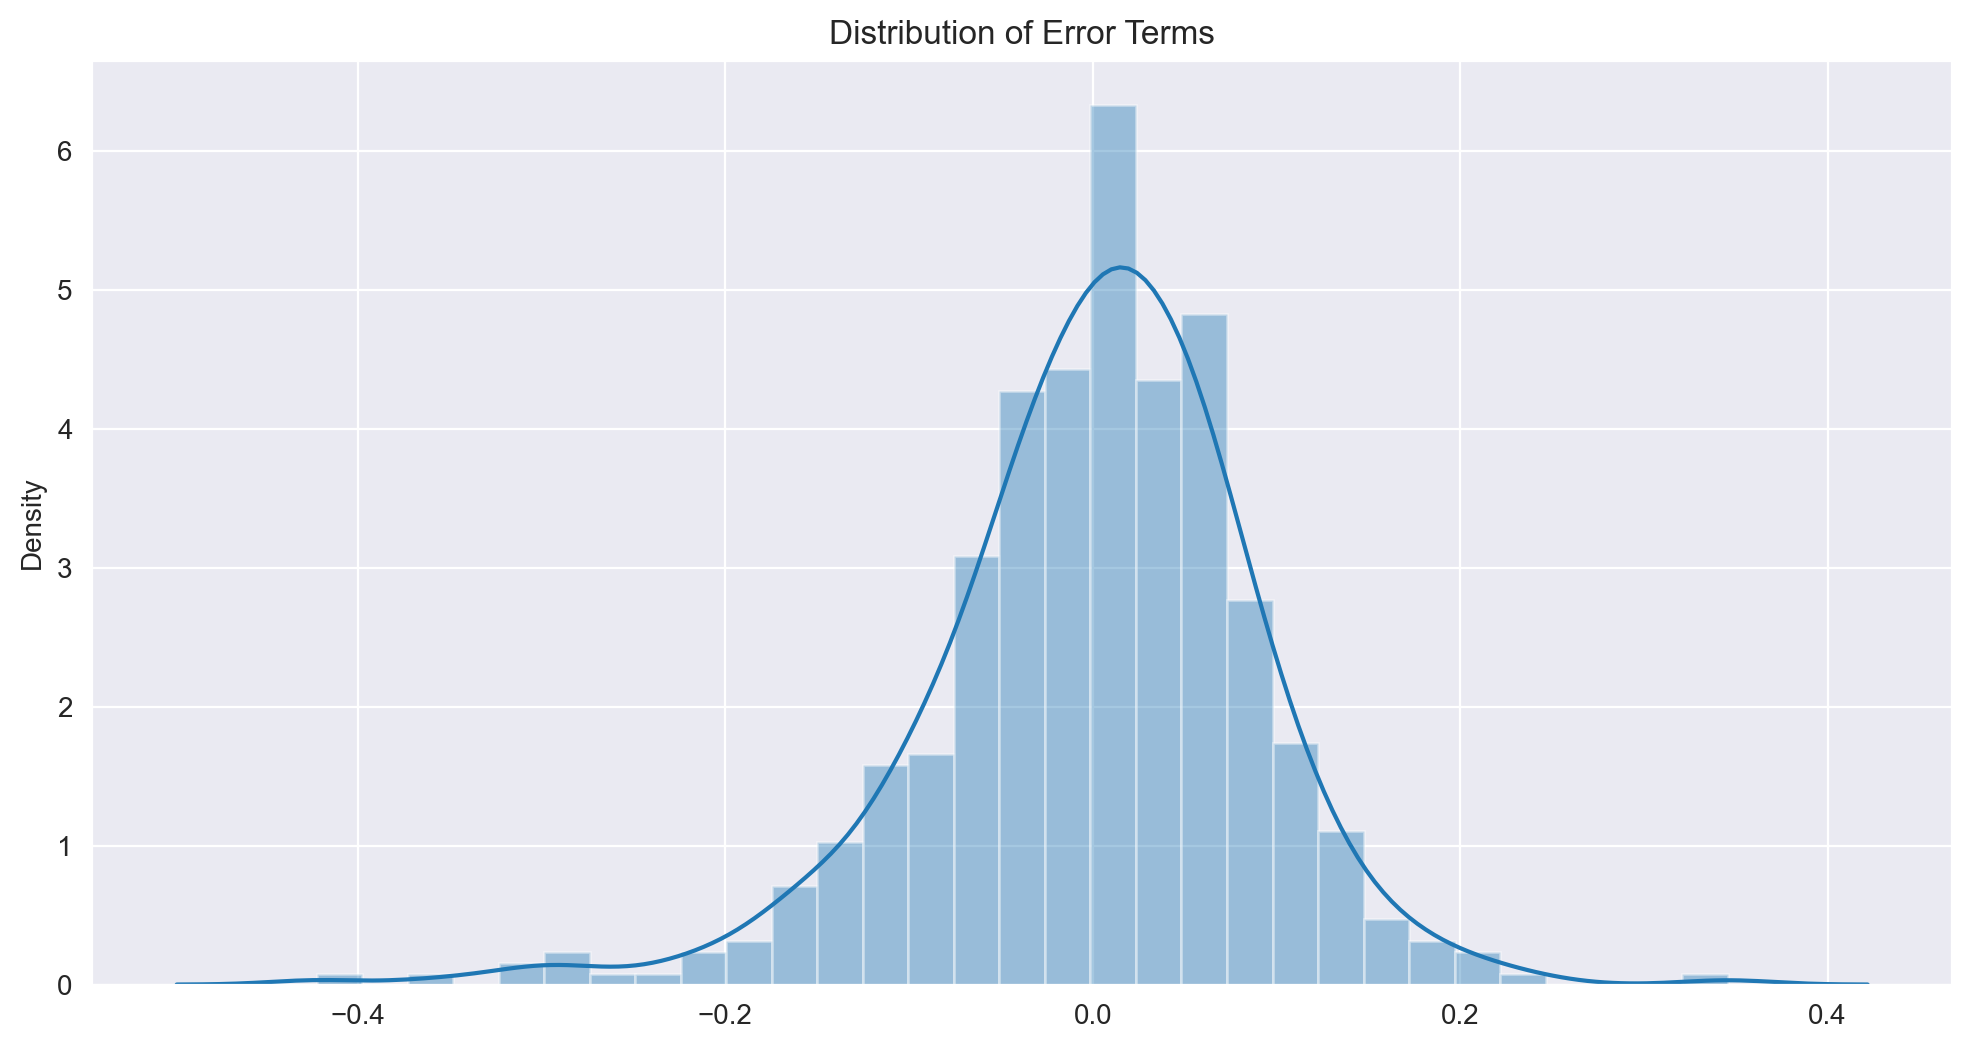

In [71]:
# Ploting of Residuals
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.distplot(lm.resid)
plt.title('Distribution of Error Terms')
plt.show()

* > qqplot 

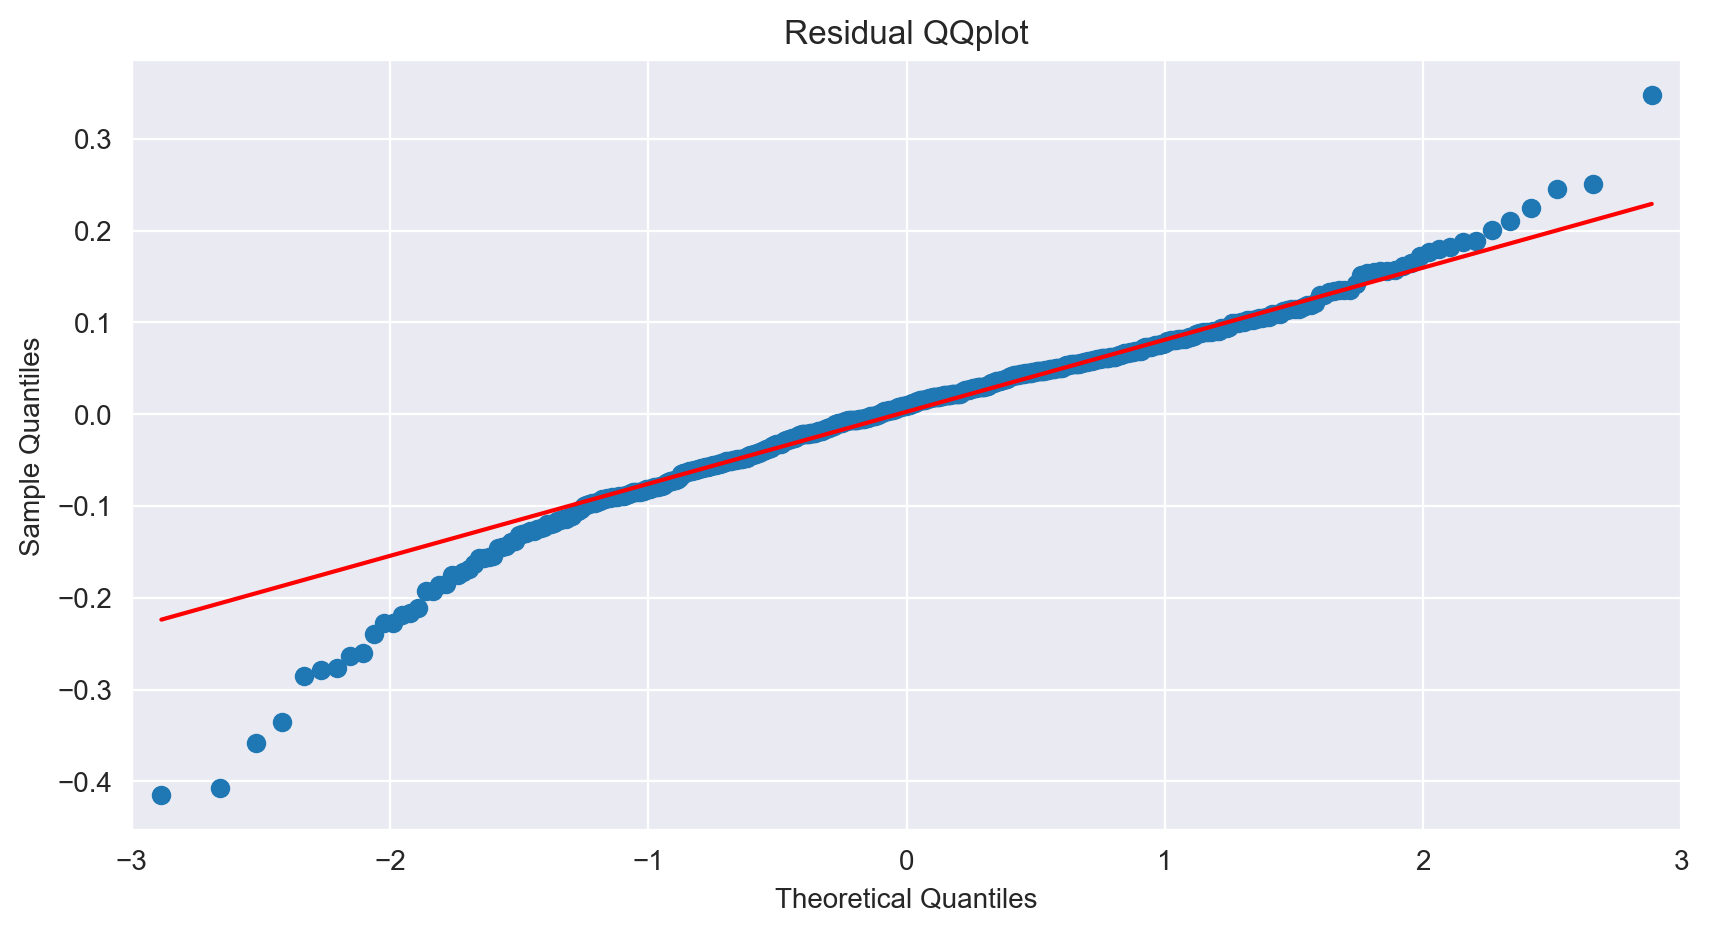

In [72]:
fig = sm.qqplot(model5.resid,line='q')
plt.title('Residual QQplot')
plt.savefig('Residual_QQplot')
plt.show()

* > Residual plot of Homoscedasticity

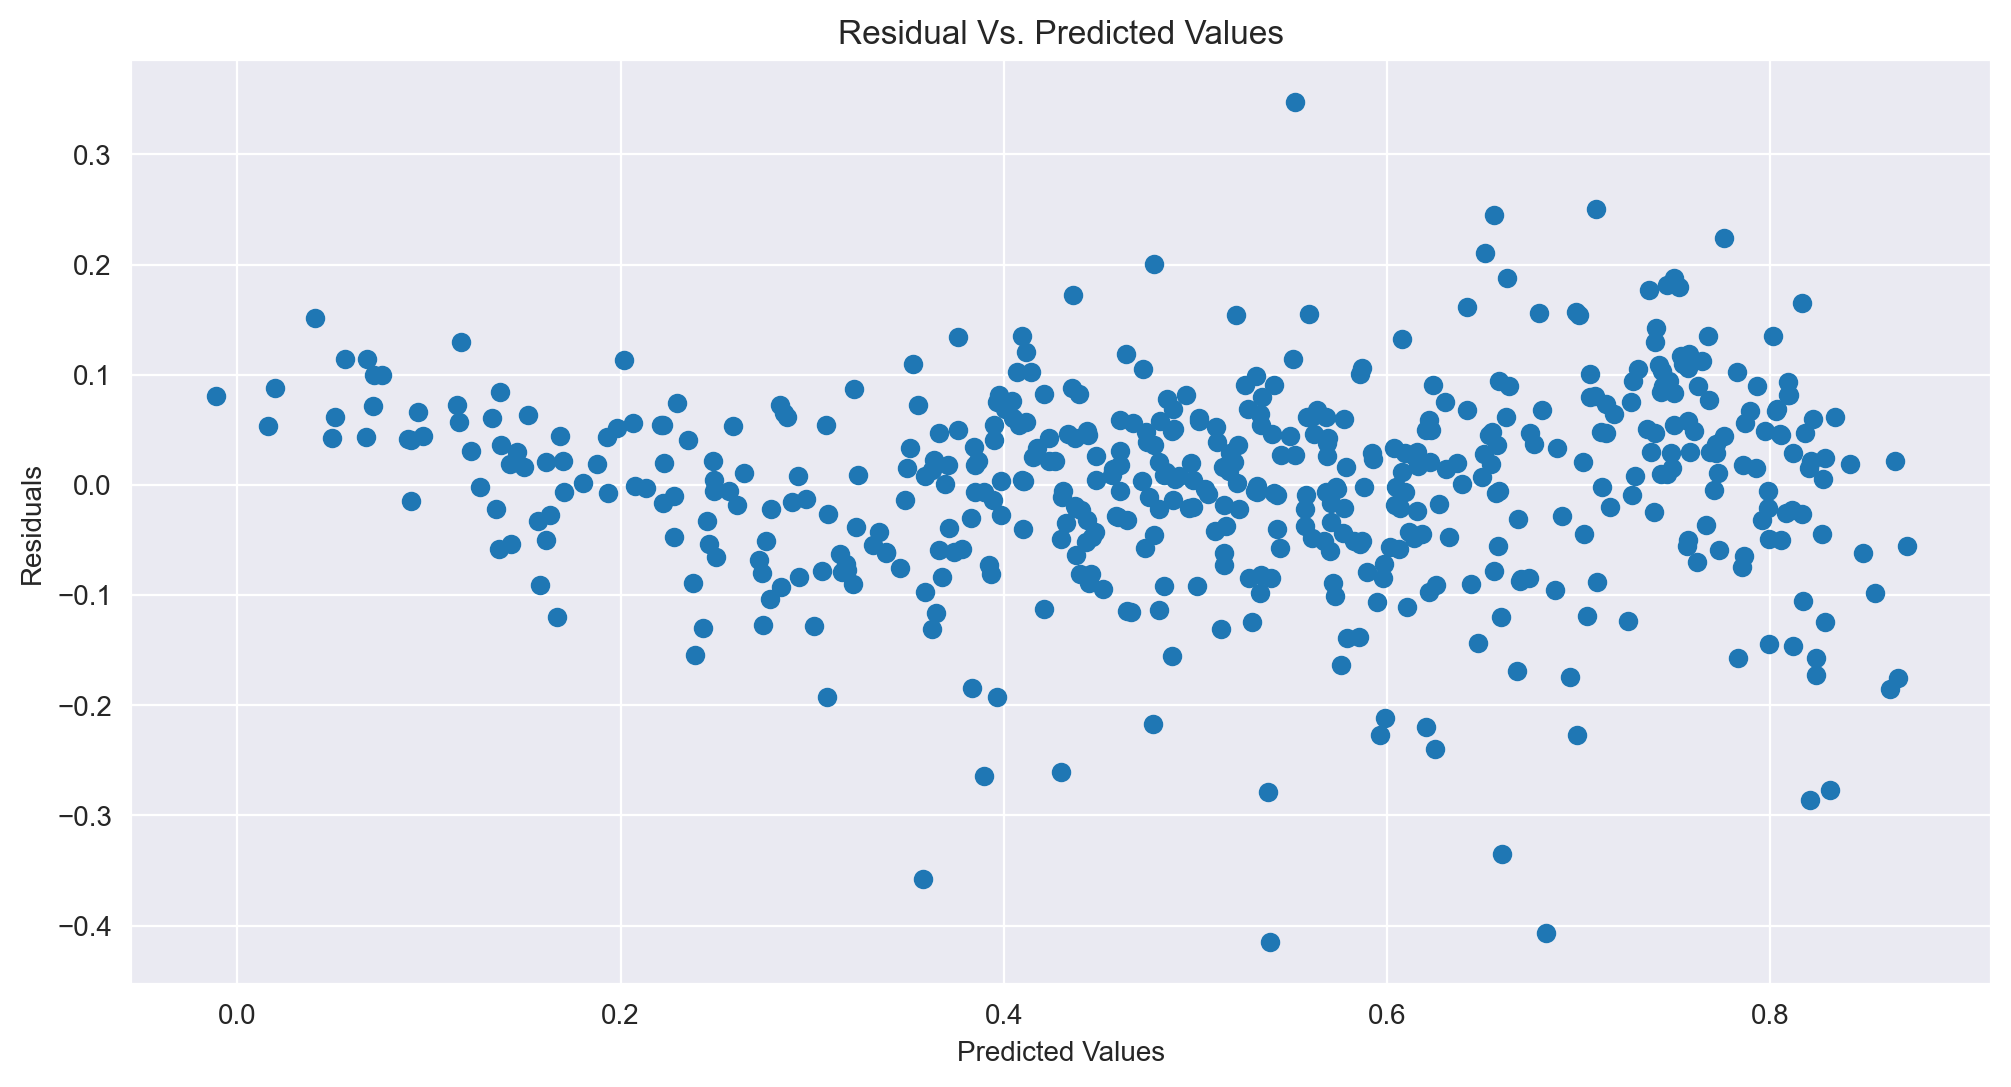

In [73]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

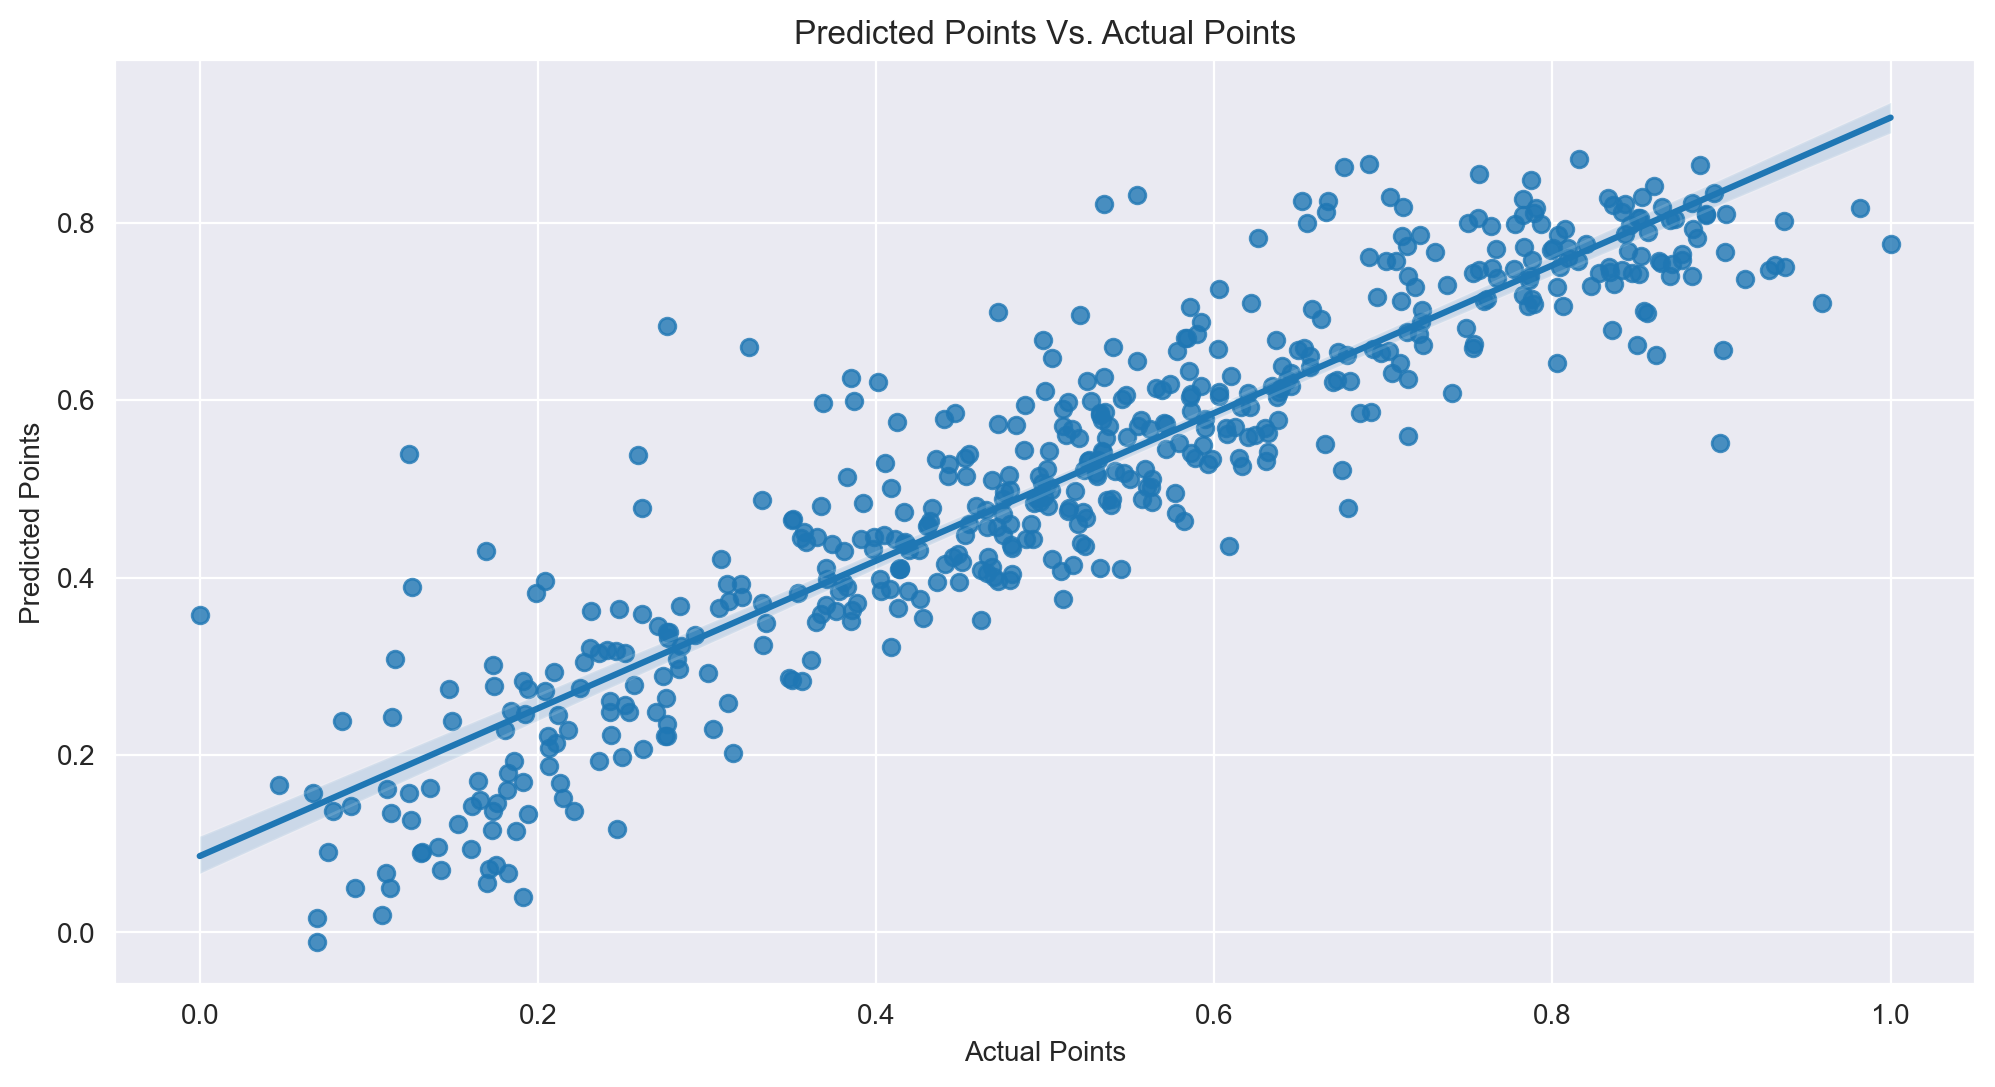

In [74]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_pred)
plt.title('Predicted Points Vs. Actual Points') 
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()


# Prediction and evaluation on test set

In [75]:
num_vars = ['temp','atemp','windspeed','hum','Count']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  ...  summer  winter  \
184    0    0    0    0     1     0    0    0    0    0  ...       0       0   
535    0    0    0    0     0     1    0    0    0    0  ...       1       0   
299    0    0    0    0     0     0    0    0    0    1  ...       0       1   
221    1    0    0    0     0     0    0    0    0    0  ...       0       0   
152    0    0    0    0     0     1    0    0    0    0  ...       1       0   

     year  holiday  workingday      temp     atemp       hum  windspeed  \
184     0        1           0  0.837241  0.778767  0.534223   0.149393   
535     1        0           1  0.911423  0.855132  0.470417   0.231142   
299     0        0           0  0.496221  0.492359  0.777843   0.443398   
221     0        0           1  0.890387  0.805661  0.236659   0.449707   
152     0        0           0  0.821739  0.749249  0.070765   0.682387   

        Count  
184  0.704300  
535  0.725421  
299  0.278853  
221  0.545512  
152  0.569148  

[5 rows x 30 columns]

In [76]:
x_test = df_test.drop('Count',axis=1)
y_test = df_test['Count']
x_test.head()

Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  ...  spring  summer  \
184    0    0    0    0     1     0    0    0    0    0  ...       0       0   
535    0    0    0    0     0     1    0    0    0    0  ...       0       1   
299    0    0    0    0     0     0    0    0    0    1  ...       0       0   
221    1    0    0    0     0     0    0    0    0    0  ...       0       0   
152    0    0    0    0     0     1    0    0    0    0  ...       0       1   

     winter  year  holiday  workingday      temp     atemp       hum  \
184       0     0        1           0  0.837241  0.778767  0.534223   
535       0     1        0           1  0.911423  0.855132  0.470417   
299       1     0        0           0  0.496221  0.492359  0.777843   
221       0     0        0           1  0.890387  0.805661  0.236659   
152       0     0        0           0  0.821739  0.749249  0.070765   

     windspeed  
184   0.149393  
535   0.231142  
299   0.443398  
221   0.449707  
152   0.682387  

[5 rows x 29 columns]

In [77]:
x_test_lr = x_test.drop(columns=['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday', 'atemp'],axis=1,inplace=True)

In [78]:
#adding constant to dataset
x_test_lr = sm.add_constant(x_test)
x_test_lr = x_test_lr[x_train_lm5.columns]

# predicting on test data
y_pred_test = model5.predict(x_test_lr)

In [79]:
r2 = r2_score(y_test,y_pred_test)
r2    

0.7894929810656203

In [80]:
# n is number of rows in test dataset
n = x_test_lr.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = x_test_lr.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
print(adjusted_r2)

0.7773


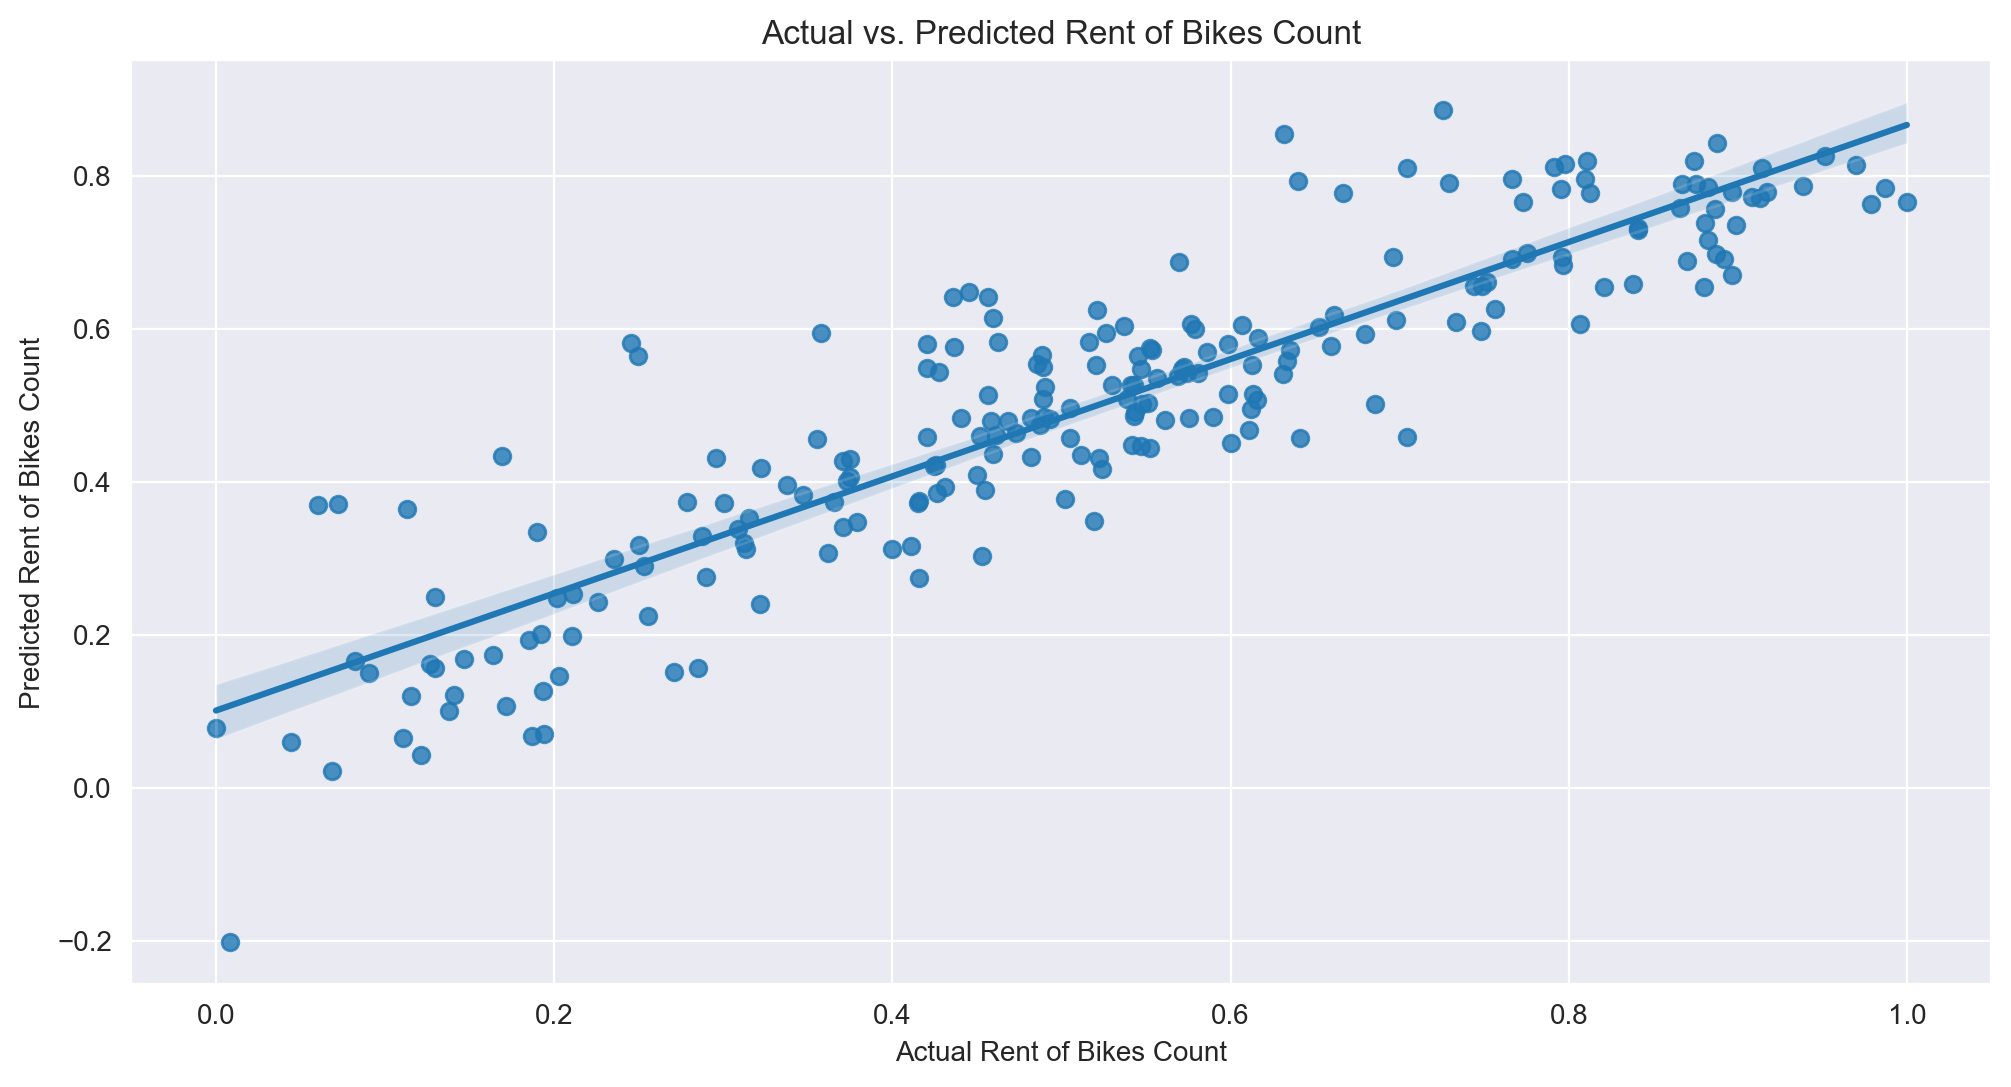

In [81]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_pred_test)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

# OBSERVATION:

- The actual v/s predicted values are quite close

FINAL METRICS COMPARISON

- Training R-squared : 0.832

- Training Adjusted R-squared : 0.829

- Test R-squared: 0.786

- Test Adjusted R-squared: 0.775

- Difference in R-squared between Training and Test dataset: 4%

- Difference in adjusted R-squared between Training and test:4.7% (<5%)

# AdaBoosting

In [82]:
from sklearn.ensemble import AdaBoostRegressor

- R2 value for Train model

In [83]:
ab = AdaBoostRegressor()
modelADA = ab.fit(x_train_rfe,y_train)
y_pred_ada = ab.predict(x_train_rfe)
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, y_pred_ada))

R2 Value: 0.8492082551230773


- R2 value for test model

In [84]:
modelADA = ab.fit(x_test_lr,y_test)
y_pred_ada = ab.predict(x_test_lr)
print('R2 Value:',metrics.r2_score(y_test, y_pred_ada))

R2 Value: 0.869380567834112


# Decision Tree

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [86]:
params = {
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5,6,7,8,9]
    }

In [87]:
grid = GridSearchCV(DecisionTreeRegressor(), param_grid=params,cv=5)

In [88]:
grid.fit(x_train_rfe,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [89]:
grid.best_params_

{'max_depth': 8, 'splitter': 'random'}

- Decision Tree apply for Train model
 - check R2 value

In [90]:
dt = DecisionTreeRegressor(max_depth=6,splitter='random')
dt.fit(x_train_rfe,y_train)
ypred = dt.predict(x_train_rfe)

In [91]:
from sklearn.metrics import r2_score
r2_score(y_train,ypred)

0.8641317425770043

- Decision Tree apply for Test model
   - check R2 value

In [92]:
dt = DecisionTreeRegressor(max_depth=6,splitter='random')
dt.fit(x_test_lr,y_test)
ypred = dt.predict(x_test_lr)

In [93]:
r2_score(y_test,ypred)

0.8838375060740576

- Train model R2 value : 0.8624772123235056
- Test model R2 value :  0.8811536054908793   

# Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
param_grid = {
    'n_estimators': [10,20,30,40,50,60,70,80],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3,4,5,6,7,8,9],
    'max_leaf_nodes': [3,4,5,6,7,8,9,10],
}

In [99]:
grid_search = GridSearchCV(RandomForestRegressor(),
                           param_grid=param_grid)

In [100]:
grid_search.fit(x_train_rfe,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80]})

In [101]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': 10,
 'n_estimators': 60}

- Rendom Forest apply for Train model
  - check R2 value

In [102]:
rf_Train = RandomForestRegressor(n_estimators=60, max_features=None,max_leaf_nodes=10,max_depth=8)
rf_Train.fit(x_train_rfe,y_train)
ypred = rf_Train.predict(x_train_rfe)

In [103]:
r2_score(y_true=y_train,y_pred=ypred)

0.8514887332657322

- Rendom Forest apply for Test model
   - check R2 value

In [104]:
rf = RandomForestRegressor(n_estimators=10, max_features=None,max_leaf_nodes=10,max_depth=4)
rf.fit(x_test_lr,y_test)
ypred = rf.predict(x_test_lr)

In [105]:
r2_score(y_true=y_test,y_pred=ypred)

0.8645644566235471

- Train model R2 value : 0.8554427080119741
- Test model R2 value : 0.8601992128893653

# CONCLUSION

1.The Random Forest Regression can be used for prediction as it have high performance compared to other algorithms.

2.The model can help the company to distribute the required bike count to satisfy the needs of the user at hourly basis.

# Deployment
- For Deployment we select OLS model 

In [106]:
# Import Library

In [107]:
import pickle

In [108]:
pickle_out = open('bike.pkl',mode = 'wb')
pickle.dump(model5,pickle_out)
pickle_out.close()

In [109]:
x_train_rfe.columns

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light_Snow', 'Mist+Cloudy',
       'spring', 'summer', 'winter', 'year', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')